# Fetal Health Classification

The reduction of infant mortality is a critical goal in the United Nations' Sustainable Development Goals, serving as a vital measure of human advancement. The UN's aim is that by 2030, nations will eradicate the avoidable deaths of infants and children below five years old, targeting to bring down the mortality rate to no more than 25 deaths per 1,000 live births.

Closely related to child mortality is maternal mortality, which was responsible for around 295,000 deaths during and after pregnancy and childbirth in 2017. Predominantly occurring in settings with limited resources, a significant number of these deaths could have been avoided.

In this context, Cardiotocograms (CTGs) offer an affordable and straightforward method to evaluate fetal health. They provide healthcare practitioners with vital information, enabling them to act to prevent both child and maternal deaths. CTGs operate by emitting and interpreting ultrasound signals, which gives insights into various indicators of fetal wellbeing, such as heart rate, movements, and uterine contractions.

Dataset Link: https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification

## Features of Data

## Goal of the Project

The main purpose of the dataset created with information received from pregnant women is to prevent baby deaths. In this context, the project's goal is to predict the baby's health status through examinations performed after the formation of the fetus. Target data 'fetal_health' consists of 3 separate labels. The main purpose of the prediction models to be created is to predict each label correctly, that is, to find true positive results with the least error. Therefore, recall and precision will be the most important results in this study.

## 1. Data Importing and Libraries

In [1]:
!pip install scikeras
!pip install --upgrade scikit-learn
!pip install --upgrade scikeras
!pip install --upgrade tensorflow

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, cross_val_predict, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, accuracy_score, f1_score, recall_score, precision_score, precision_recall_curve
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from scikeras.wrappers import KerasClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2, l1
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [3]:
healthDf = pd.read_csv("fetal_health.csv")

In [4]:
healthDf.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


## 2. Data Cleaning

In [5]:
healthDf.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In the dataset's description, we can say that some features have outlier values. According to the table above, we predict that some features will have outlier values: 'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability', 'histogram_variance', and 'fetal_movement'.

### 2.1 Checking Missing and Duplicated Values

In [6]:
healthDf.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

There is no missing value in the dataset.

In [7]:
# Checking duplicated rows
healthDf.duplicated().sum()

13

In [8]:
# Finding the duplicated rows
for column in healthDf.columns:
    if healthDf[column].duplicated().any():
        print(f"'{column}' has duplicated values")

'baseline value' has duplicated values
'accelerations' has duplicated values
'fetal_movement' has duplicated values
'uterine_contractions' has duplicated values
'light_decelerations' has duplicated values
'severe_decelerations' has duplicated values
'prolongued_decelerations' has duplicated values
'abnormal_short_term_variability' has duplicated values
'mean_value_of_short_term_variability' has duplicated values
'percentage_of_time_with_abnormal_long_term_variability' has duplicated values
'mean_value_of_long_term_variability' has duplicated values
'histogram_width' has duplicated values
'histogram_min' has duplicated values
'histogram_max' has duplicated values
'histogram_number_of_peaks' has duplicated values
'histogram_number_of_zeroes' has duplicated values
'histogram_mode' has duplicated values
'histogram_mean' has duplicated values
'histogram_median' has duplicated values
'histogram_variance' has duplicated values
'histogram_tendency' has duplicated values
'fetal_health' has dupl

In [9]:
# Looking for duplicated rows more detailed
duplicates = healthDf.duplicated(keep=False)
healthDf[duplicates]

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
67,140.0,0.007,0.000,0.004,0.0,0.0,0.0,34.0,1.2,0.0,...,119.0,179.0,2.0,0.0,156.0,153.0,155.0,5.0,0.0,1.0
68,140.0,0.007,0.000,0.004,0.0,0.0,0.0,34.0,1.2,0.0,...,119.0,179.0,2.0,0.0,156.0,153.0,155.0,5.0,0.0,1.0
229,123.0,0.003,0.003,0.000,0.0,0.0,0.0,52.0,0.8,2.0,...,50.0,140.0,7.0,0.0,129.0,128.0,130.0,4.0,1.0,1.0
233,123.0,0.000,0.000,0.000,0.0,0.0,0.0,49.0,0.8,7.0,...,63.0,137.0,2.0,0.0,129.0,127.0,129.0,2.0,1.0,1.0
234,123.0,0.000,0.000,0.000,0.0,0.0,0.0,49.0,0.8,7.0,...,63.0,137.0,2.0,0.0,129.0,127.0,129.0,2.0,1.0,1.0
304,145.0,0.000,0.020,0.000,0.0,0.0,0.0,77.0,0.2,45.0,...,129.0,150.0,1.0,0.0,146.0,145.0,147.0,0.0,1.0,2.0
306,145.0,0.000,0.020,0.000,0.0,0.0,0.0,77.0,0.2,45.0,...,129.0,150.0,1.0,0.0,146.0,145.0,147.0,0.0,1.0,2.0
323,135.0,0.000,0.000,0.000,0.0,0.0,0.0,62.0,0.5,71.0,...,71.0,168.0,3.0,0.0,143.0,142.0,144.0,1.0,1.0,3.0
324,135.0,0.000,0.000,0.000,0.0,0.0,0.0,62.0,0.5,71.0,...,71.0,168.0,3.0,0.0,143.0,142.0,144.0,1.0,1.0,3.0
326,144.0,0.000,0.019,0.000,0.0,0.0,0.0,76.0,0.4,61.0,...,71.0,152.0,3.0,0.0,145.0,144.0,146.0,2.0,1.0,2.0


In [10]:
healthDf = healthDf.drop_duplicates(keep='first')
healthDf

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


Duplicate values were dropped from the dataset.

In [11]:
healthDf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2113 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2113 non-null   float64
 1   accelerations                                           2113 non-null   float64
 2   fetal_movement                                          2113 non-null   float64
 3   uterine_contractions                                    2113 non-null   float64
 4   light_decelerations                                     2113 non-null   float64
 5   severe_decelerations                                    2113 non-null   float64
 6   prolongued_decelerations                                2113 non-null   float64
 7   abnormal_short_term_variability                         2113 non-null   float64
 8   mean_value_of_short_term_variability       

### 2.2 Checking Outliers Based on Data Describe

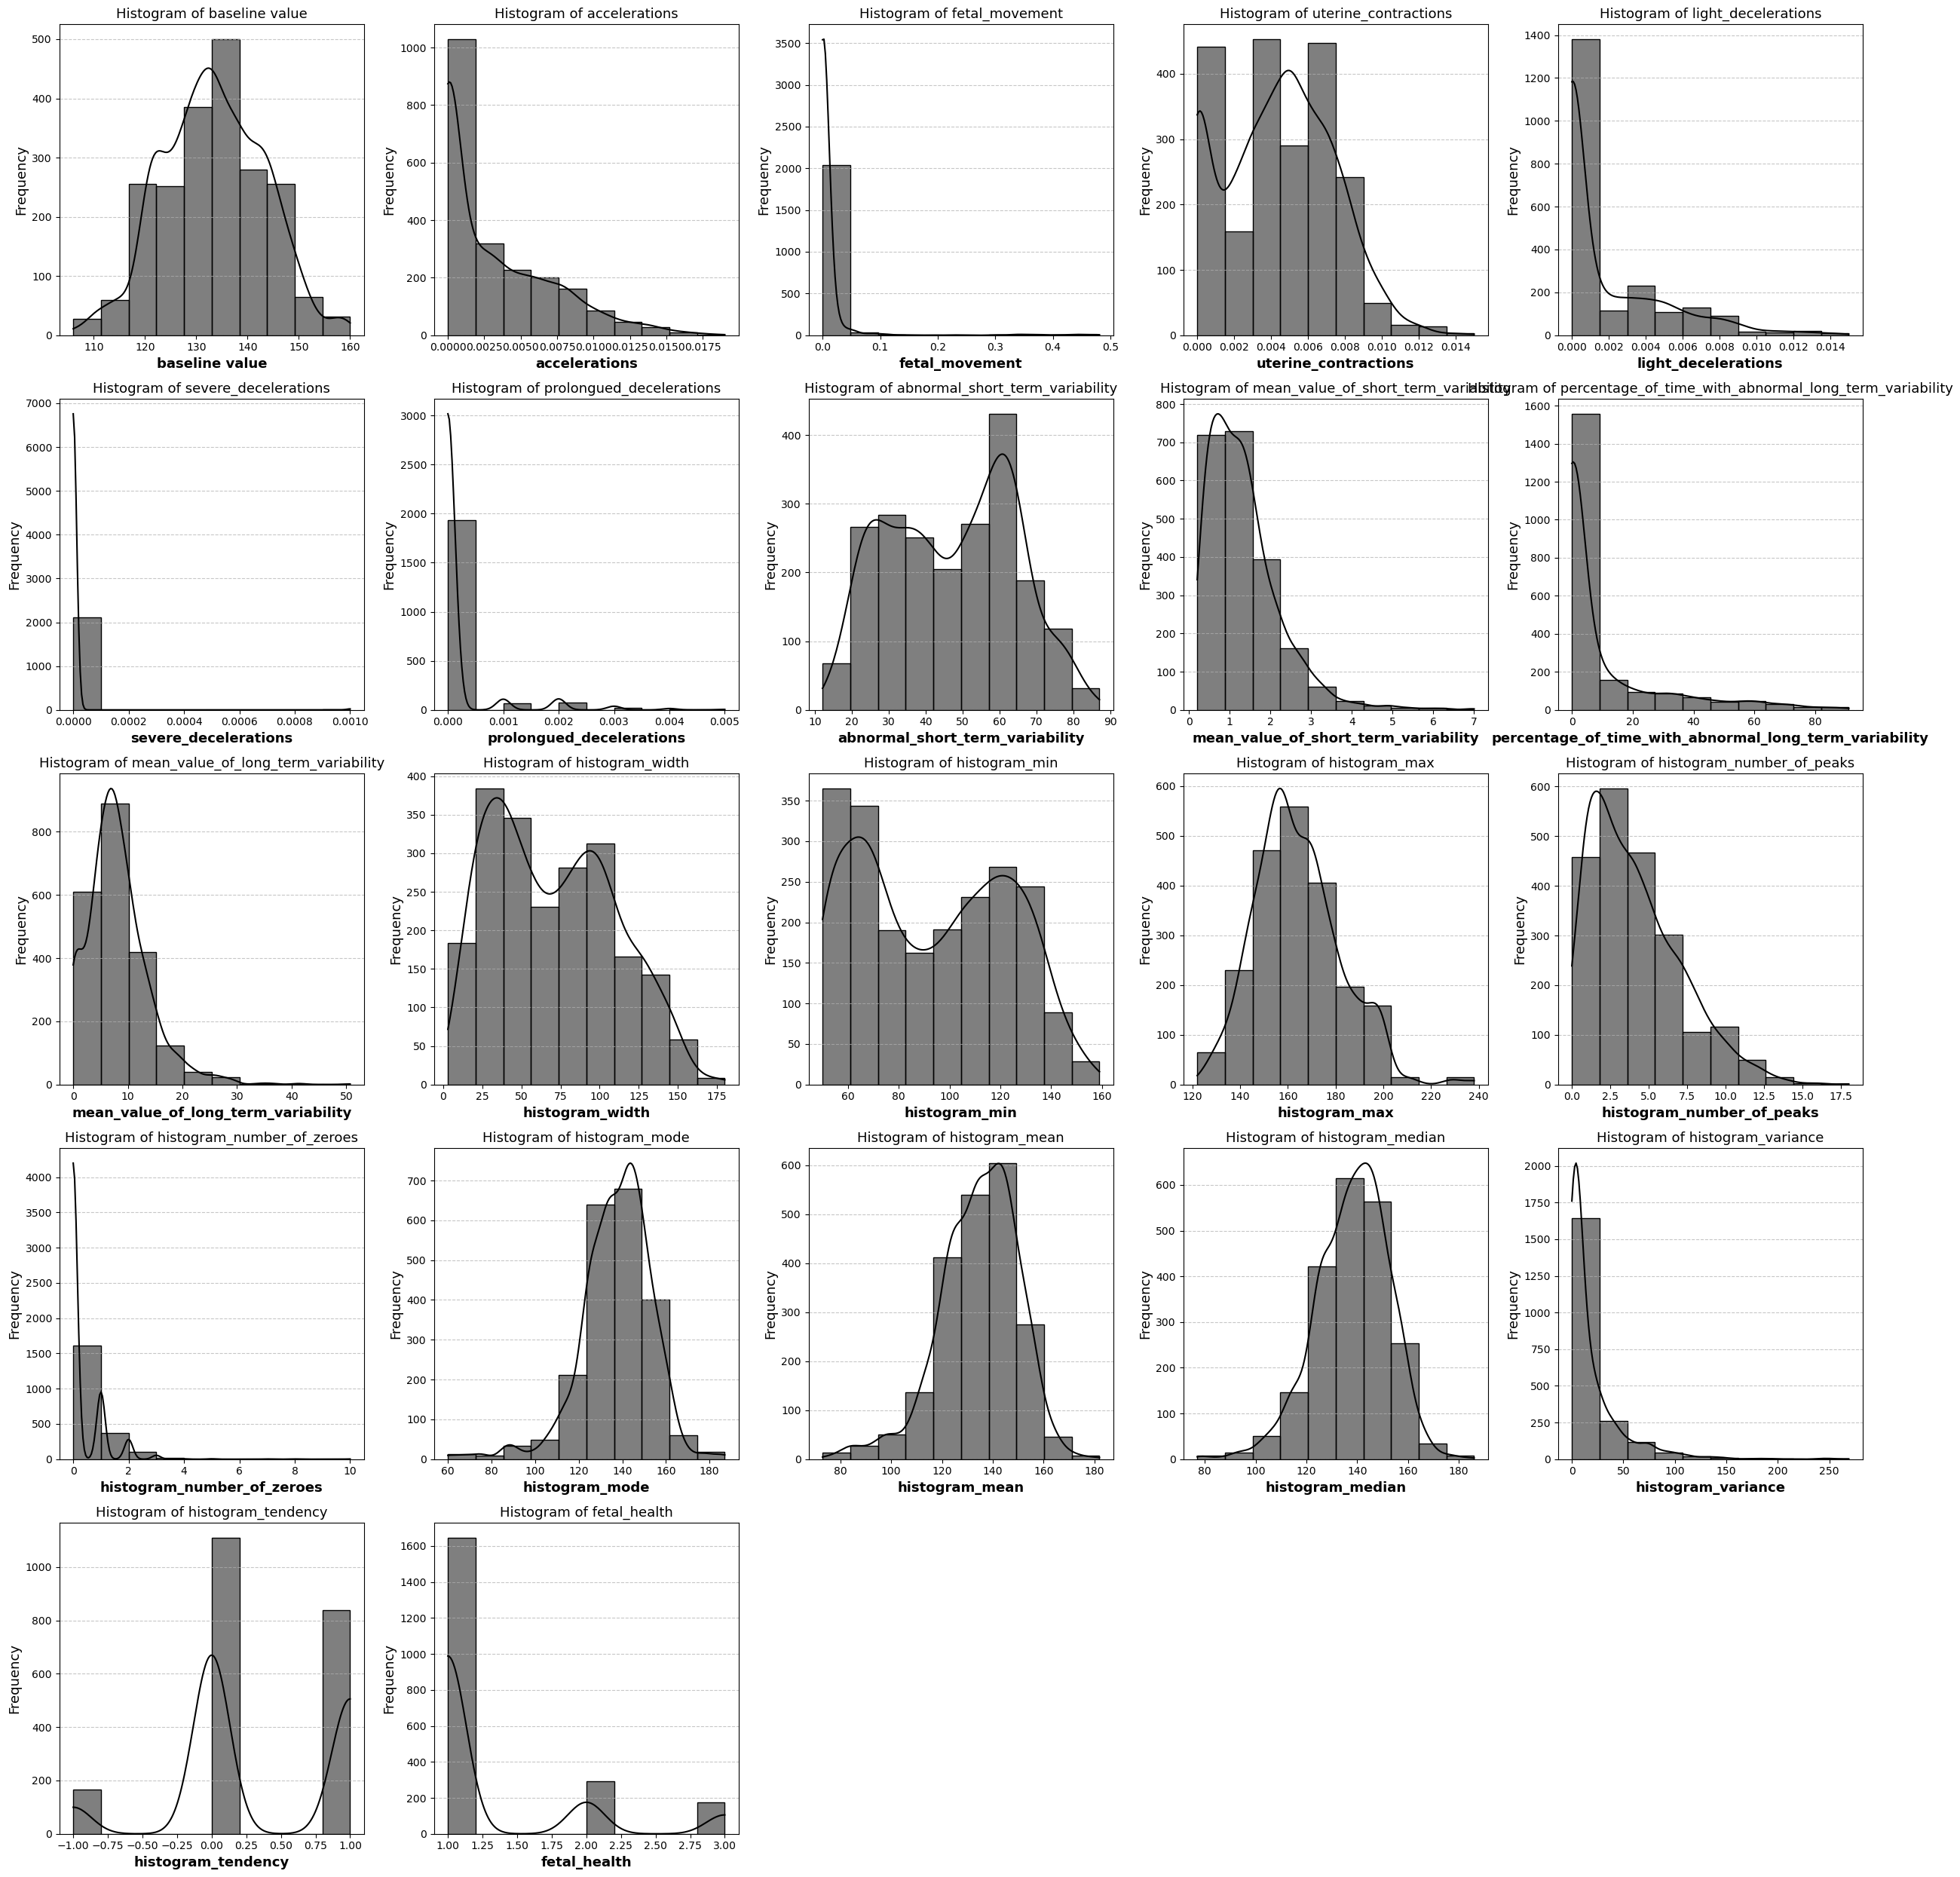

In [12]:
columns = healthDf.columns
num_bins = 10
num_cols = 5
num_rows = (len(columns) - 1) // num_cols + 1
subplot_size = 5

fig, axs = plt.subplots(num_rows, num_cols, figsize=(subplot_size * num_cols, subplot_size * num_rows))
axs = axs.ravel()

for i, col in enumerate(columns):
    sns.histplot(healthDf[col], bins=num_bins, kde=True, ax=axs[i], color='black', edgecolor='black')
    axs[i].set_title(f'Histogram of {col}', fontsize=13)
    axs[i].set_xlabel(col, fontsize=13, weight='bold')
    axs[i].set_ylabel('Frequency', fontsize=13)
    axs[i].grid(axis='y', linestyle='--', alpha=0.7)

for i in range(len(columns), num_rows * num_cols):
    axs[i].axis('off')

plt.tight_layout()
plt.show()

These histograms display the distribution of various health-related metrics, with most showing a distribution that is close to a normal curve. Many of the features are concentrated around specific central values, indicating that the majority of the attributes are confined to a specific range and exhibit relatively normal variation. In some features, there is a heavy concentration of data points in lower values with long tails extending to the right, suggesting a possible right skew and the presence of potential outliers at higher values. Other features demonstrate infrequently occurring events, represented by data points clustered at very low frequencies. Overall, these graphs suggest that the distribution of features in the data set largely falls within an expected range of health conditions, but there are certain features where potential outliers may require more detailed analysis. 

Now, let's examine the counts of categorical data in the light of these graphs and look at more detailed graphs for outlier values:

In [13]:
healthDf['prolongued_decelerations'].value_counts()


prolongued_decelerations
0.000    1935
0.002      72
0.001      70
0.003      24
0.004       9
0.005       3
Name: count, dtype: int64

In [14]:
healthDf['severe_decelerations'].value_counts()

severe_decelerations
0.000    2106
0.001       7
Name: count, dtype: int64

In [15]:
healthDf['histogram_tendency'].value_counts()

histogram_tendency
 0.0    1110
 1.0     838
-1.0     165
Name: count, dtype: int64

In [16]:
healthDf['histogram_number_of_zeroes'].value_counts()

histogram_number_of_zeroes
0.0     1611
1.0      366
2.0      108
3.0       21
4.0        2
5.0        2
10.0       1
8.0        1
7.0        1
Name: count, dtype: int64

In [17]:
healthDf['uterine_contractions'].value_counts()

uterine_contractions
0.000    323
0.005    290
0.004    242
0.006    231
0.007    216
0.003    211
0.008    160
0.002    159
0.001    118
0.009     82
0.010     49
0.011     16
0.012     11
0.013      2
0.014      2
0.015      1
Name: count, dtype: int64

In [18]:
healthDf['light_decelerations'].value_counts()

light_decelerations
0.000    1218
0.001     163
0.003     118
0.002     115
0.004     114
0.005     107
0.006      74
0.008      55
0.007      54
0.009      37
0.010      15
0.011      13
0.012      12
0.013       8
0.014       7
0.015       3
Name: count, dtype: int64

It can be seen that the value '0.0' is higher than the other values in the above features. Under normal circumstances, such imbalance situations may positively or negatively affect our analyses and future prediction models, but when we examine our dataset specifically, the same imbalance situation is seen not only in categorical features but also in many continuous features. Since the dataset specifically contains data regarding fetal health and fetal heartbeat, it is not considered an abnormal situation if some features show this imbalance.

## 3. Exploratory Data Analysis (EDA) and Pre-processing

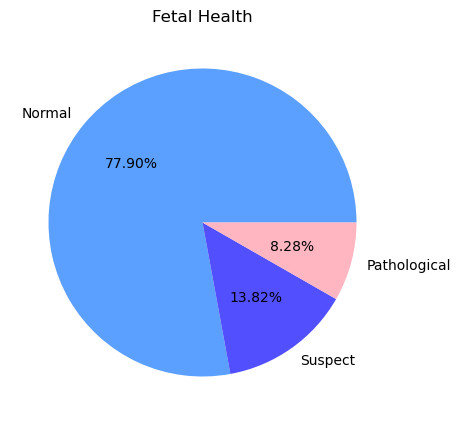

In [19]:
fetal_health_counts = healthDf['fetal_health'].value_counts()
colors = ['#5B9FFF', '#524fff', '#FFB6C1']

plt.figure(figsize=(5, 5))
plt.title("Fetal Health")
labels = ['Normal', 'Suspect', 'Pathological']

ordered_labels = [labels[int(i)-1] for i in fetal_health_counts.index]
plt.pie(fetal_health_counts, labels=ordered_labels, colors=colors, autopct='%1.2f%%')
plt.show()

It is seen that the target feature also has an imbalanced distribution. Almost 80% of the Dataset has a 'Normal' value.

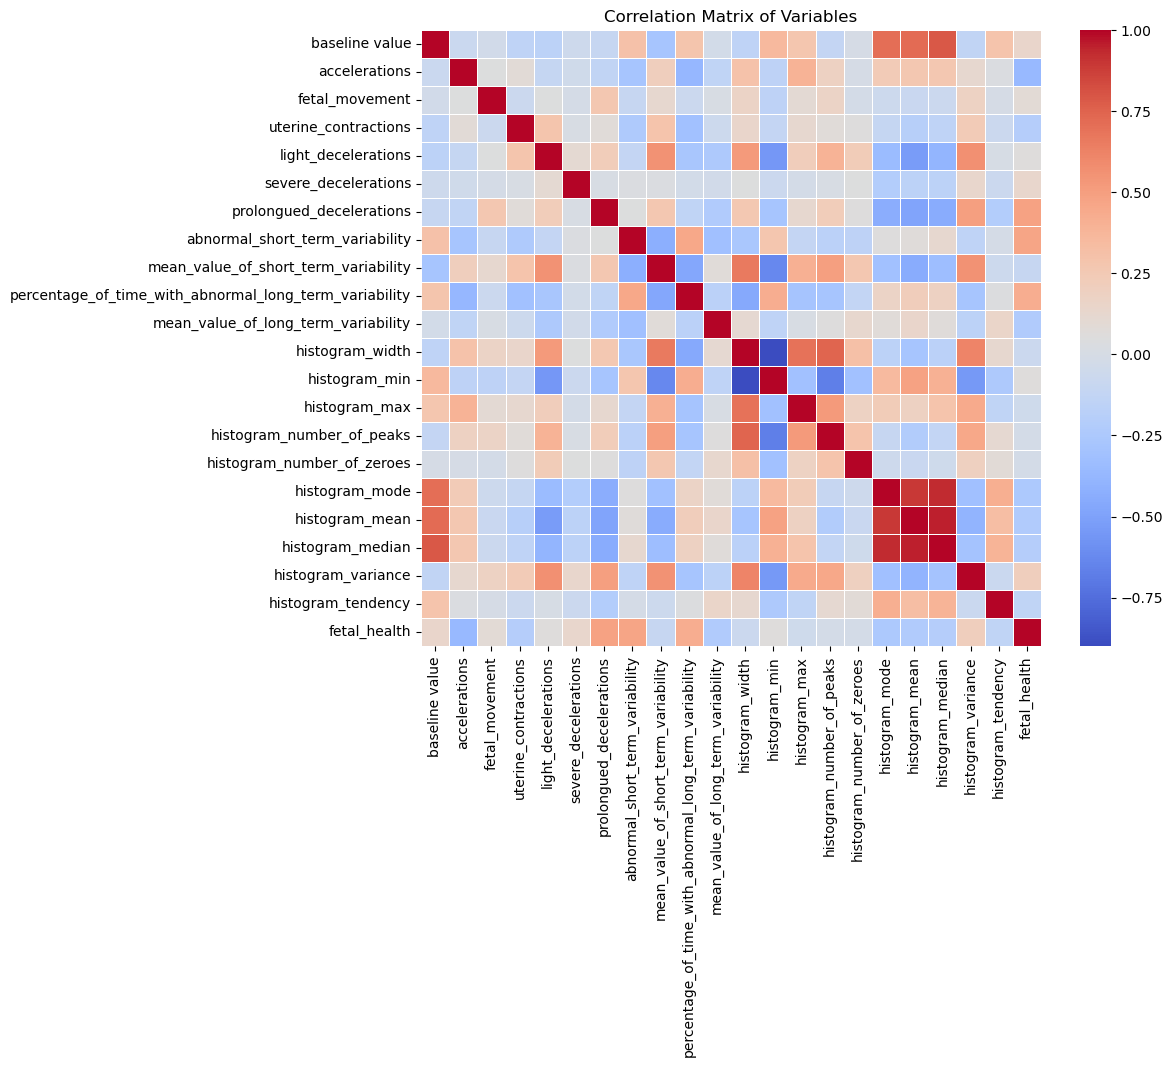

In [20]:
corr_matrix = healthDf.corr()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Variables')
plt.show()

According to the correlation heatmap, it is observed that there is a strong relationship between the independent variables 'prolongued_decelerations', 'abnormal_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability' and 'acceleration' and the target variable 'fetal_health'. Now we will examine the dataset more closely.

In [21]:
numeric_corr = healthDf.corr()
Num_feature = numeric_corr["fetal_health"].sort_values(ascending=False).to_frame()

# Defining a color map using Seaborn
cm = sns.light_palette("grey", as_cmap=True)
style = Num_feature.style.background_gradient(cmap=cm)
style


,fetal_health
fetal_health,1.000000
prolongued_decelerations,0.486752
abnormal_short_term_variability,0.469671
percentage_of_time_with_abnormal_long_term_variability,0.421634
histogram_variance,0.208171
baseline value,0.146077
severe_decelerations,0.132408
fetal_movement,0.088057
histogram_min,0.063529
light_decelerations,0.059651


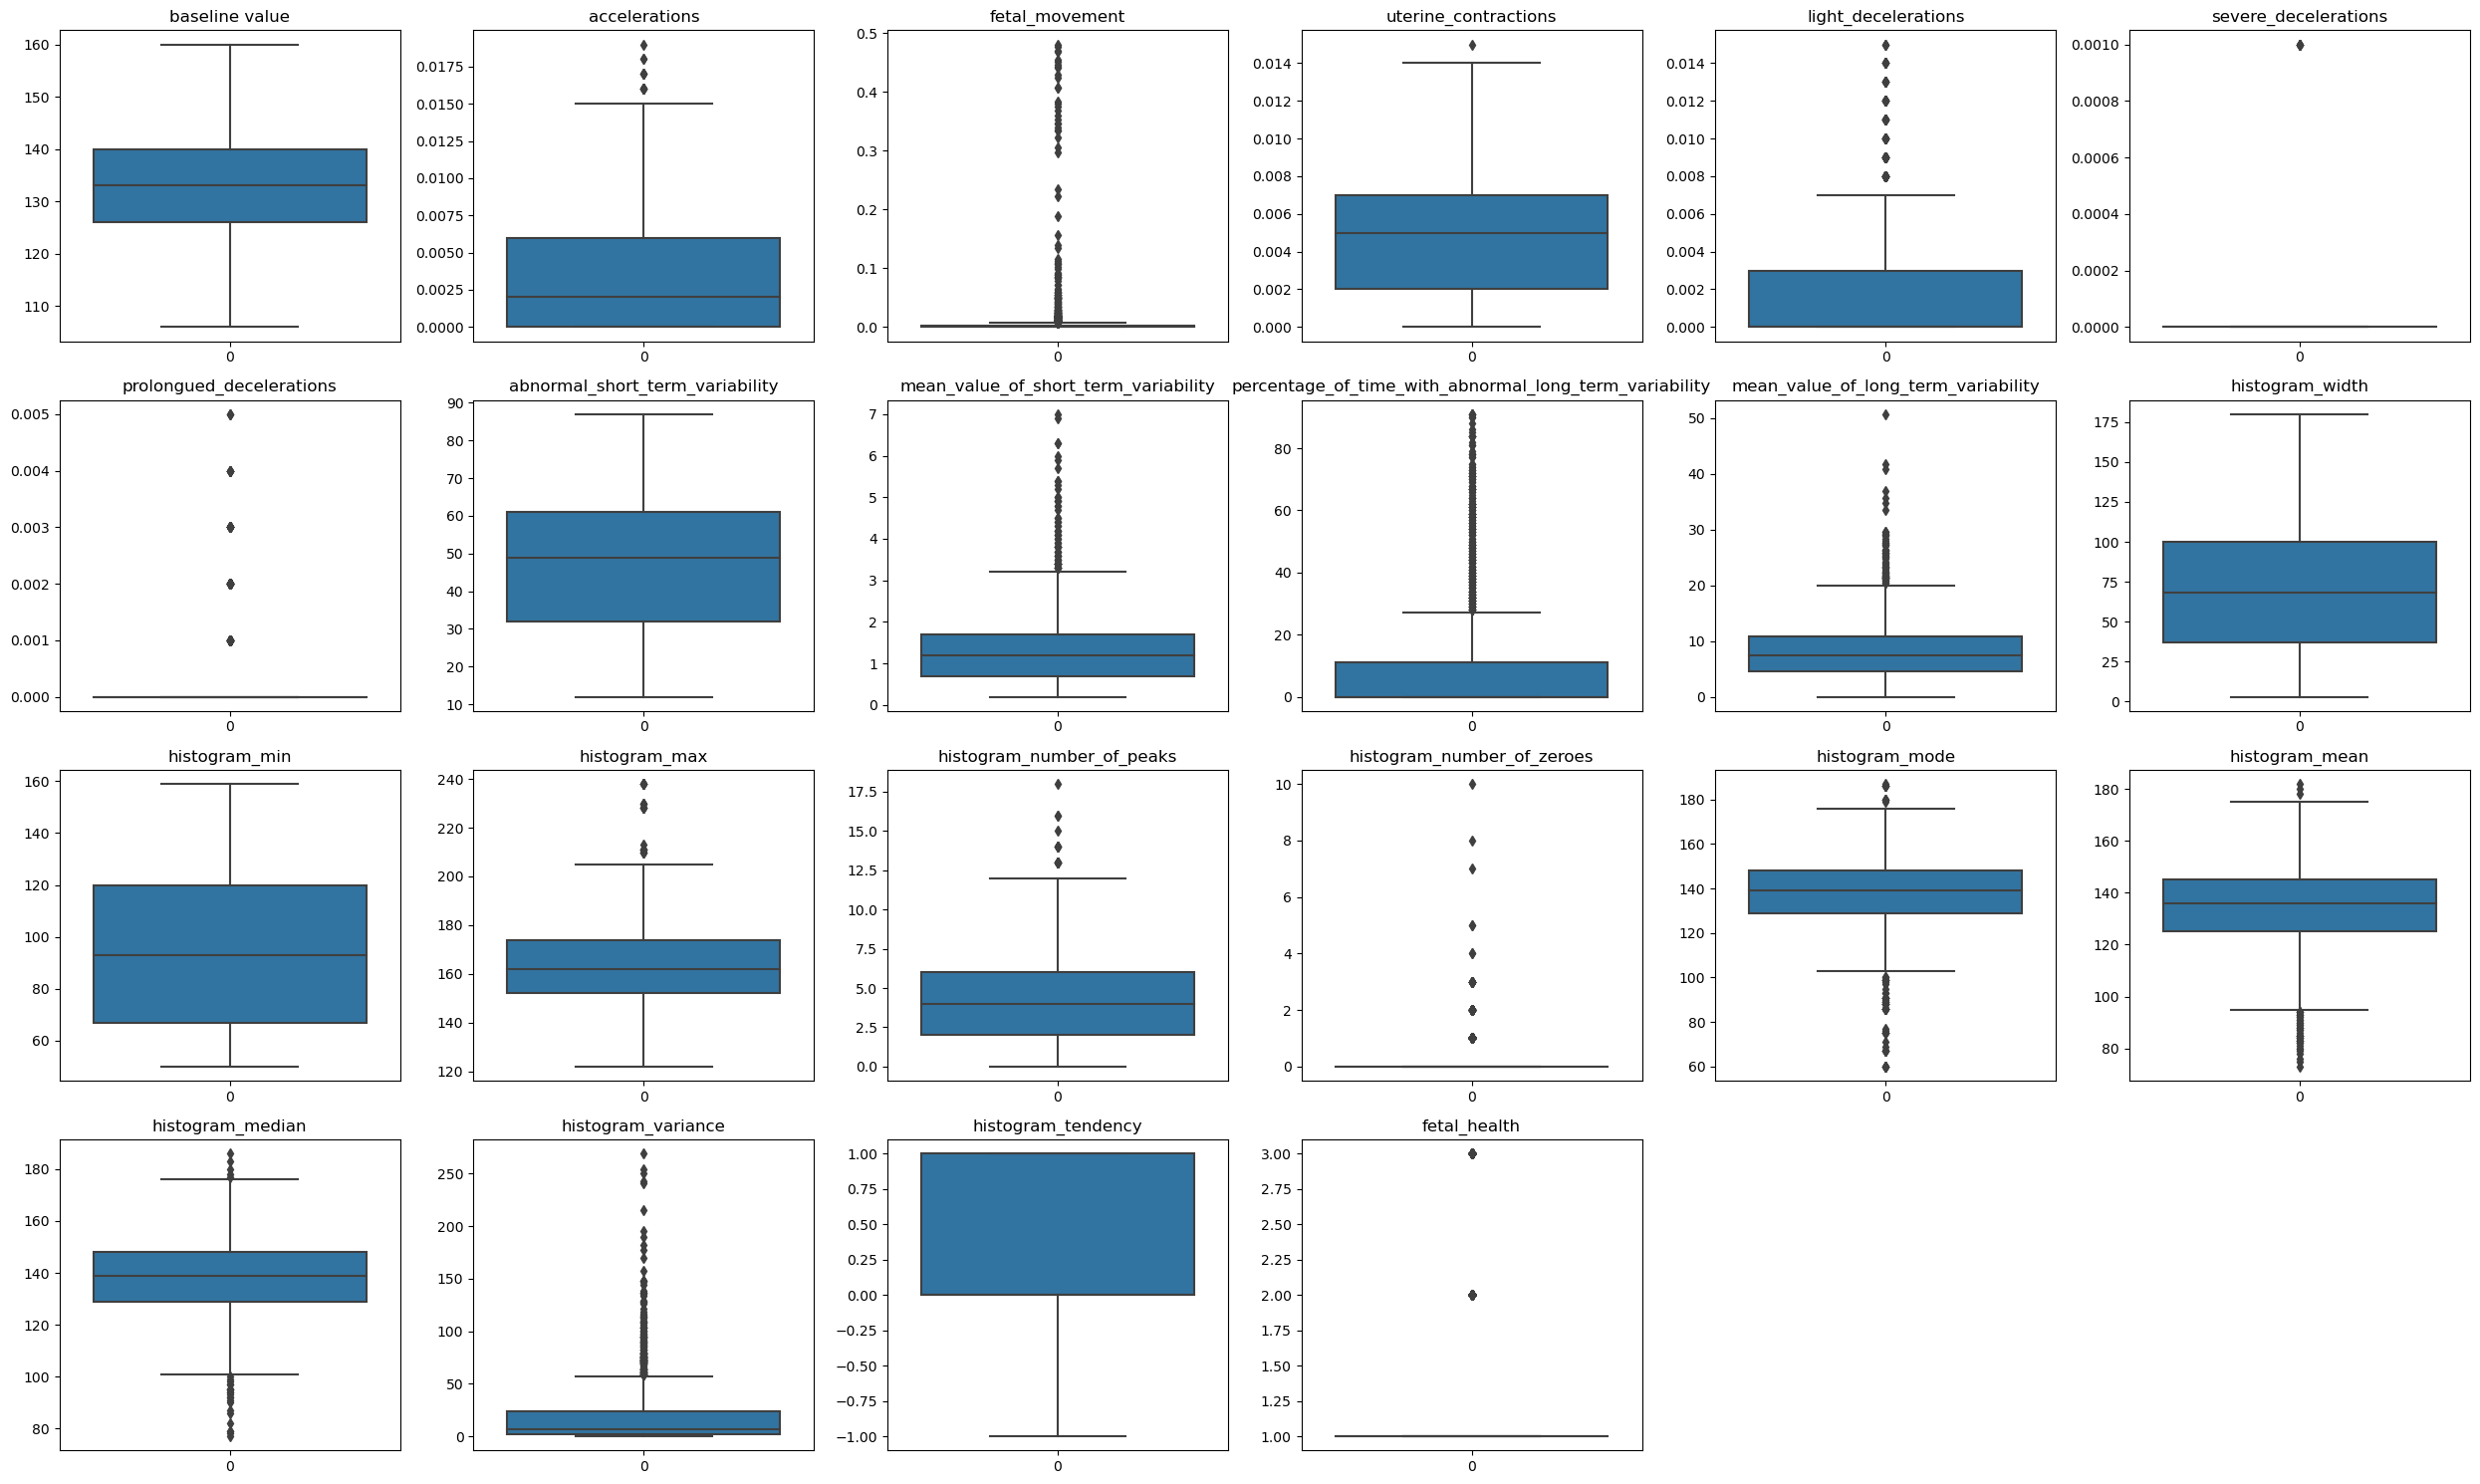

In [22]:
plt.figure(figsize=(25, 15))

for i, column in enumerate(healthDf.columns):
    plt.subplot(4, 6, i + 1)
    sns.boxplot(data=healthDf[column])
    plt.title(column)

plt.tight_layout()
plt.show()

It can be seen that some features have a symmetric distribution and are concentrated around the median, while other features show high variance and have many outliers. Removing outlier values is our normal method, but it would be unfair to remove outlier values in this dataset. Now, let's look at the scatterplots of the features that have the strongest relationship with the target value, according to the correlation map:

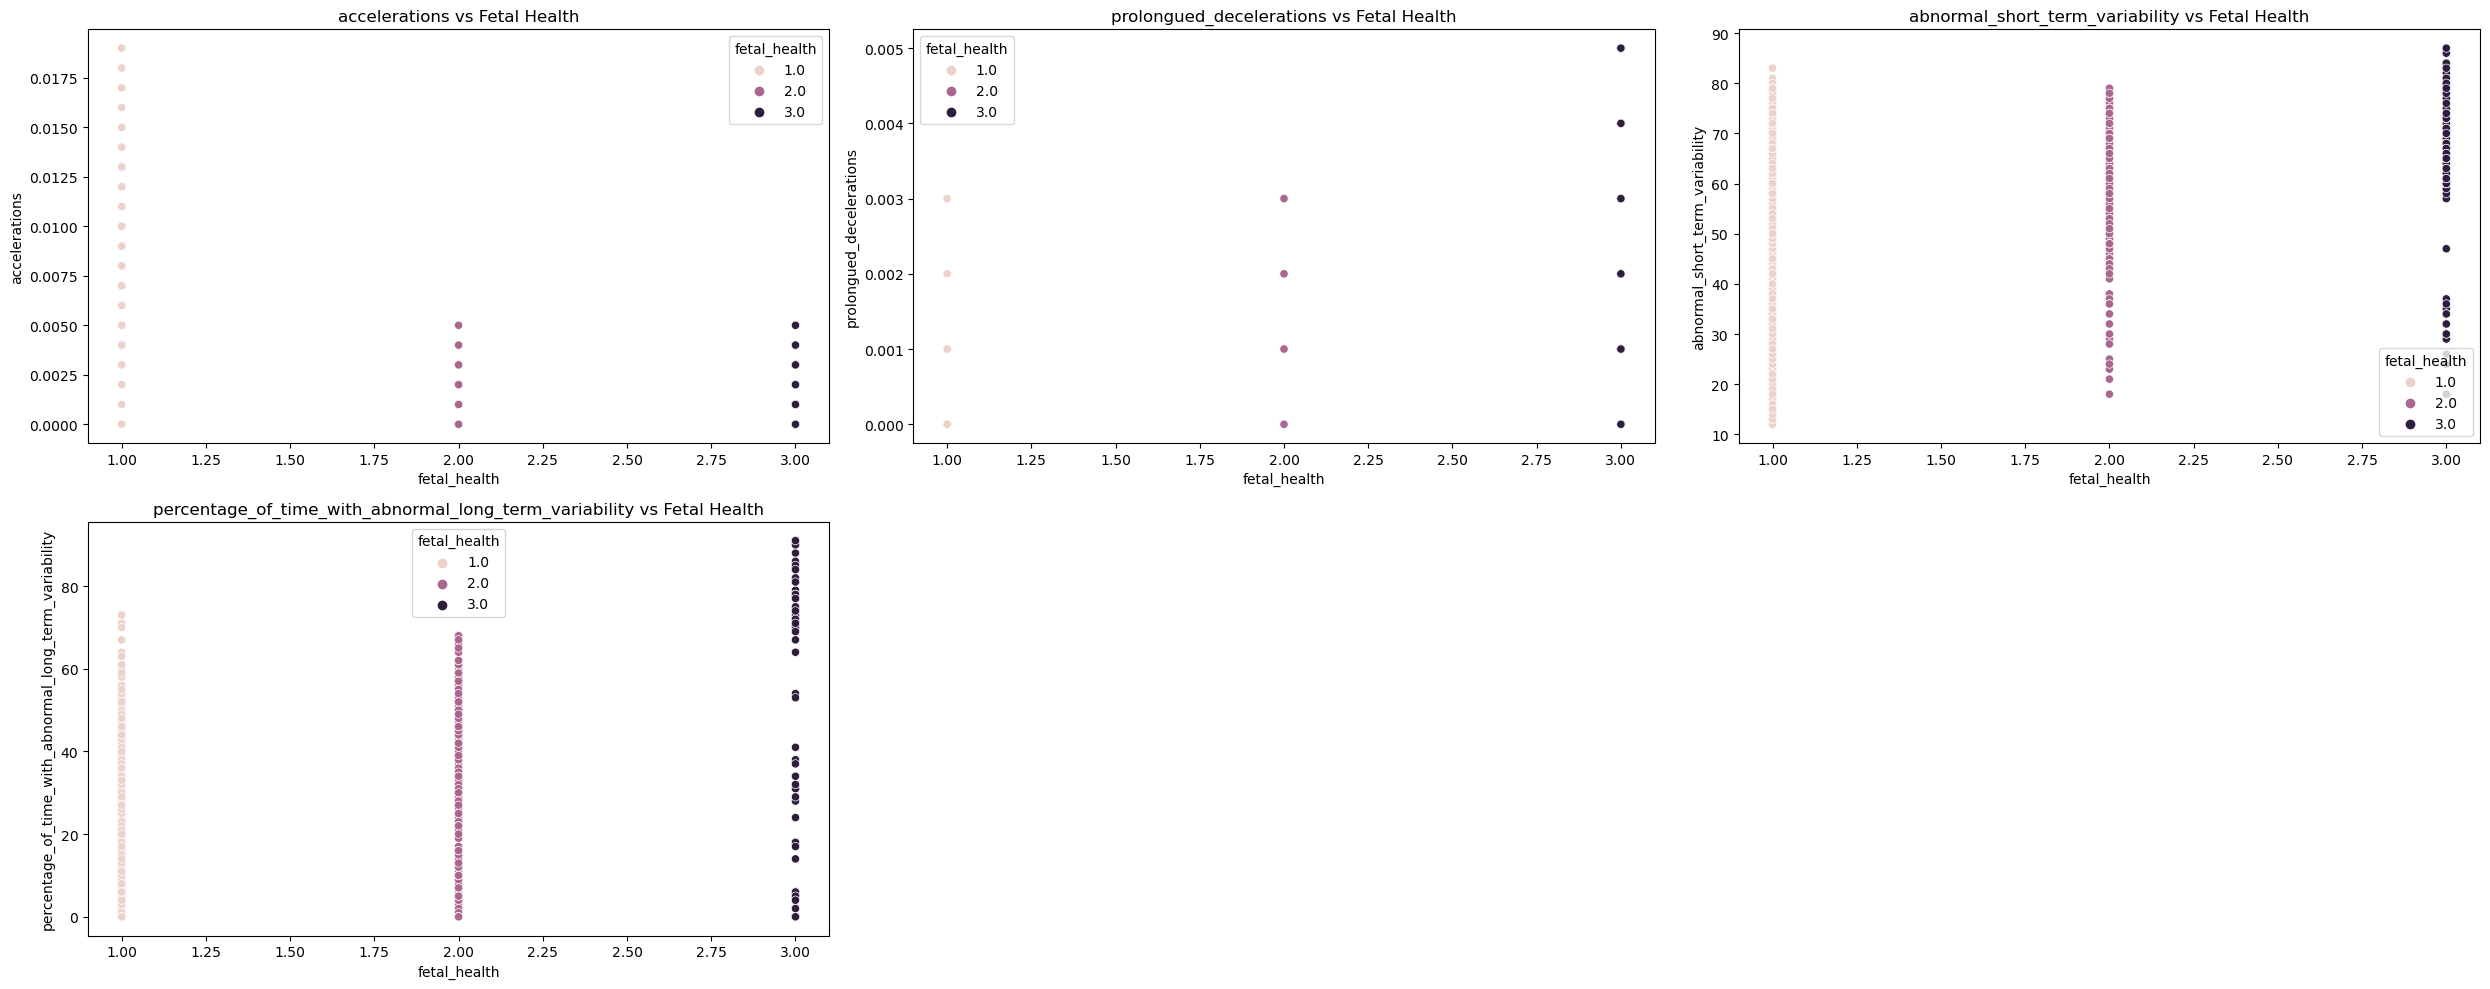

In [23]:
columns_list = ['accelerations', 'prolongued_decelerations', 'abnormal_short_term_variability',
                'percentage_of_time_with_abnormal_long_term_variability']
plt.figure(figsize=(25, 10))

for i, col in enumerate(columns_list):
    plt.subplot(2, 3, i+1)  
    sns.scatterplot(data=healthDf, x='fetal_health', y=col, hue="fetal_health")
    plt.title(col + " vs Fetal Health")

plt.tight_layout()
plt.show()


These four characteristics demonstrate significant relationships with different states of fetal health. Especially high values of abnormal long-term variability and prolonged decelerations could indicate the presence of serious fetal health issues. These observations suggest that these features could be critically important for predicting and understanding fetal health conditions. They could be prioritized in feature selection when developing a machine learning model.

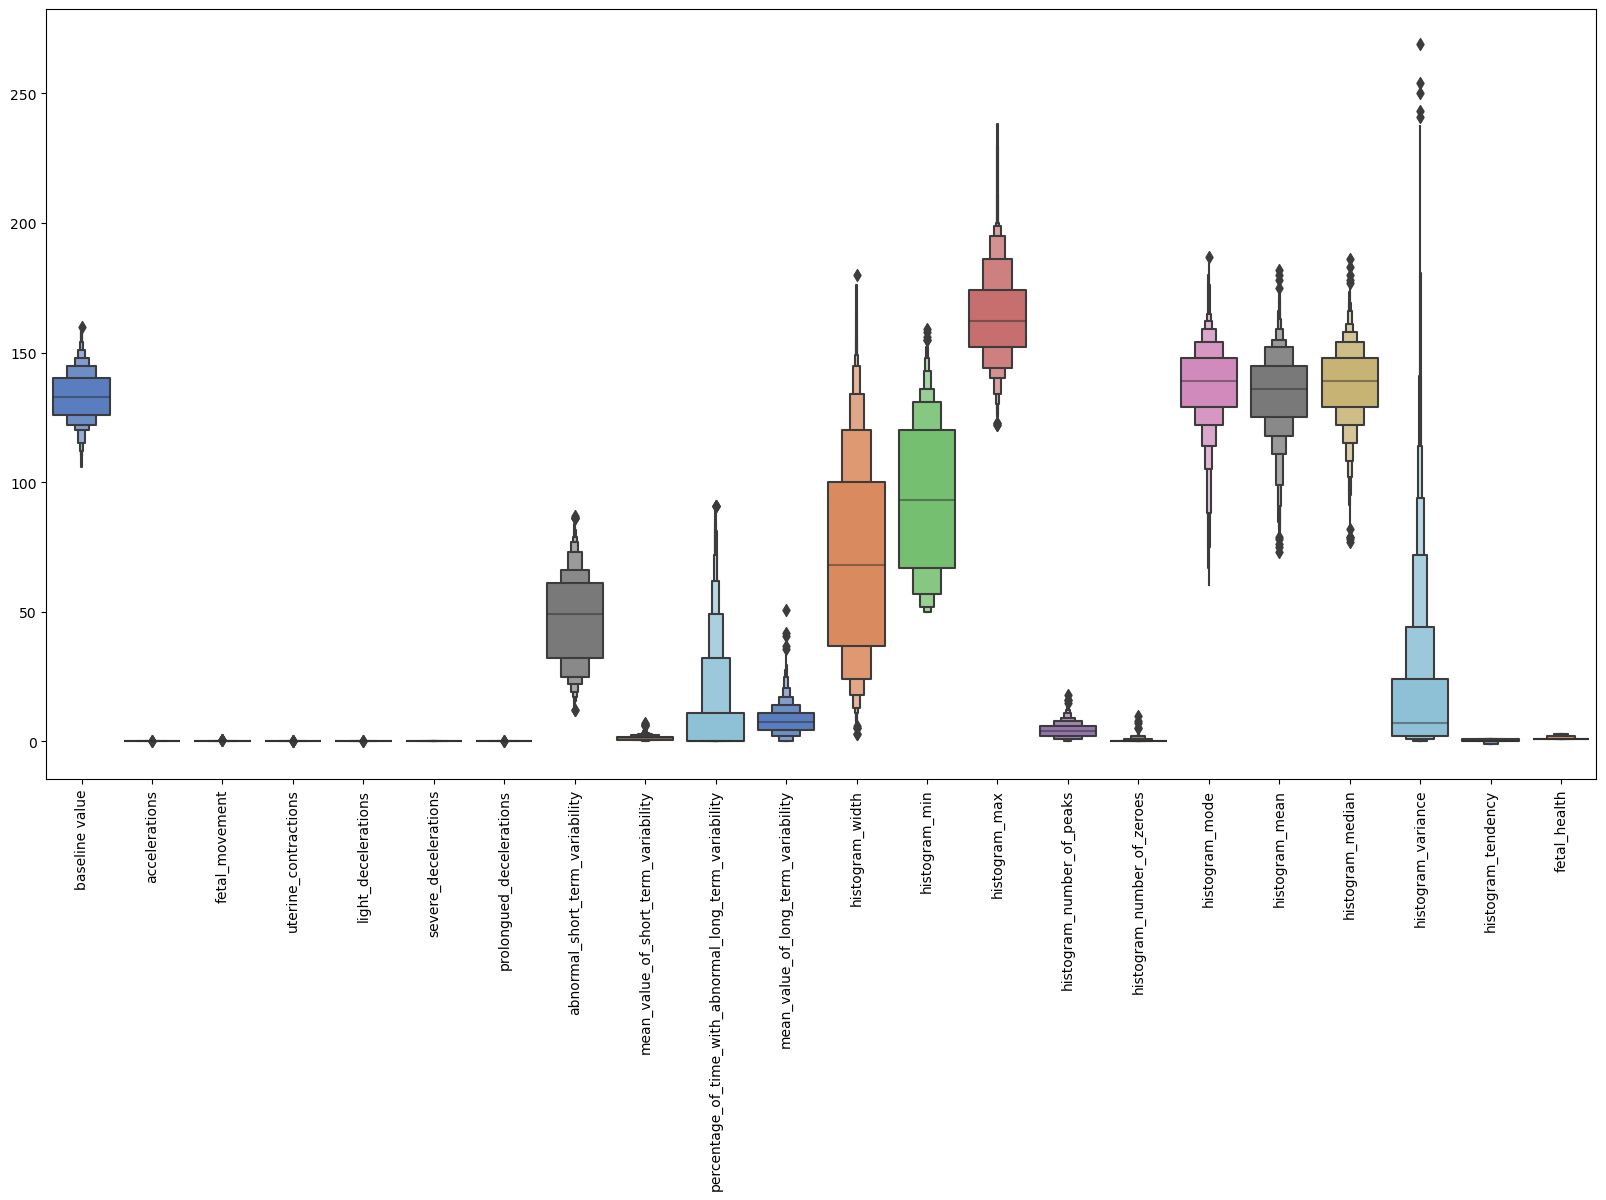

In [24]:
plt.figure(figsize=(20,10))
sns.boxenplot(data = healthDf, palette = 'muted')
plt.xticks(rotation=90)
plt.show()

In the frame above, we saw the boxplot graph on a single plane again. Since we have a lot of outlier values, we can scale our variables with standardization and analyse box-plot and histogram graphics more accurately.

Standardization mitigates the impact of outliers while preserving the overall distribution of the dataset, ensuring that features are better processed by machine learning models. Therefore, I choose to use standardization because it retains important information contained within outliers in my dataset.

In [25]:
df_standart=healthDf.copy()

In [26]:
features = df_standart.drop('fetal_health', axis=1)
scaler = StandardScaler()

scaled_features = scaler.fit_transform(features)
scaled_healthDf = pd.DataFrame(scaled_features, columns=features.columns)


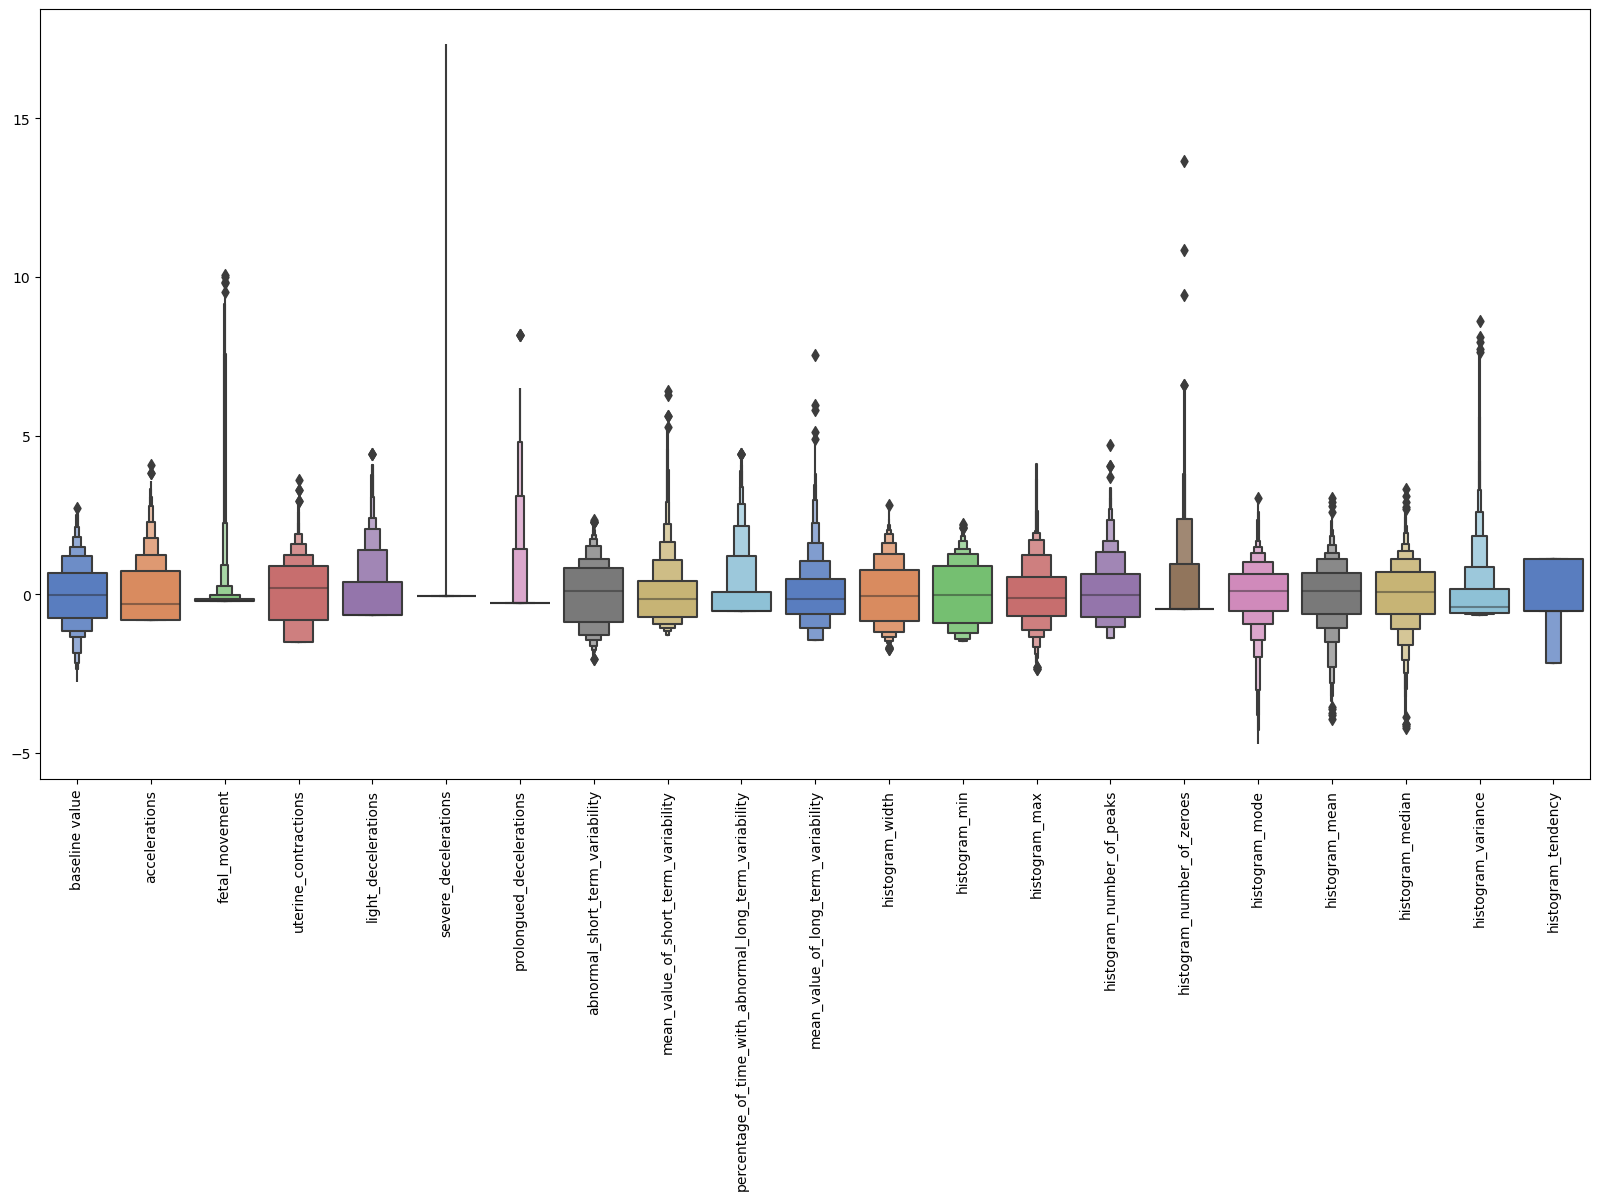

In [27]:
plt.figure(figsize=(20,10))
sns.boxenplot(data = scaled_healthDf, palette = 'muted')
plt.xticks(rotation=90)
plt.show()

If we compare two box-plot graphs, in the first one, the density of outliers is noticeable in the graph created with raw data. In the second graph created with standardized data, all boxes are of similar height and width. The distribution among features is equalized. Outliers may still exist, but they are now represented at a consistent scale across all features, preventing any one feature from being more affected than the others during modelling.

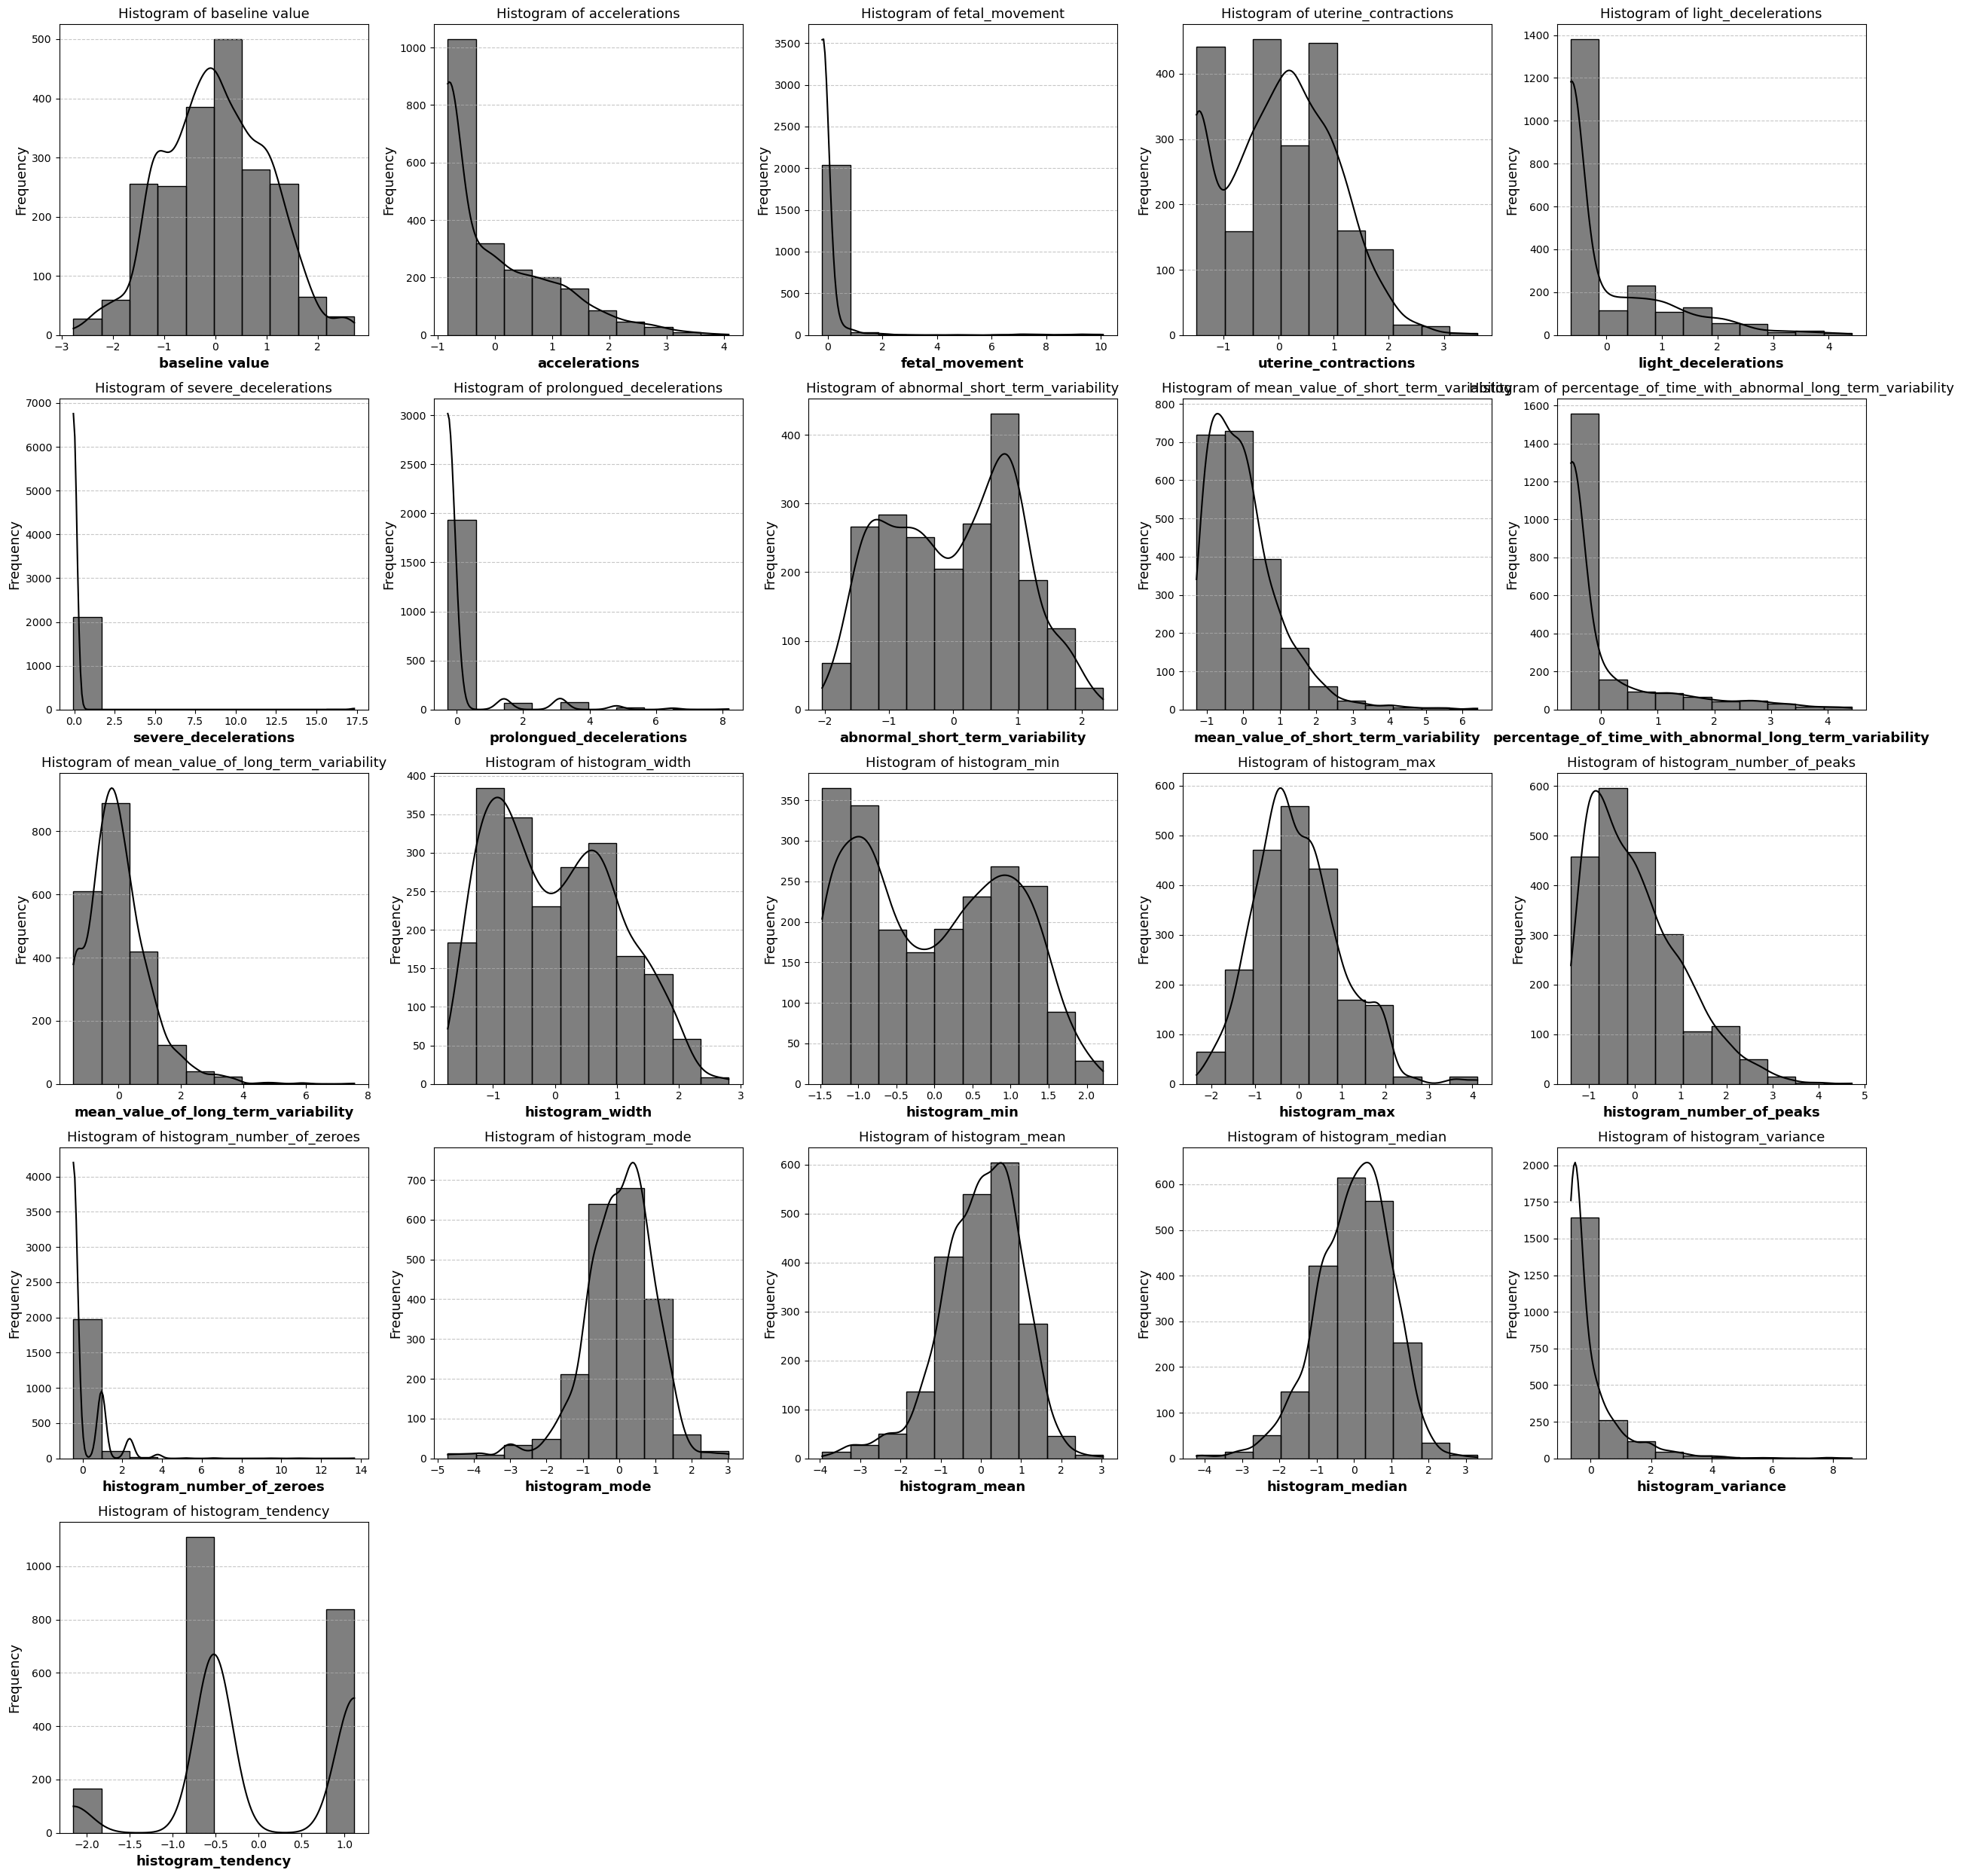

In [28]:
columns = scaled_healthDf.columns
num_bins = 10

num_cols = 5
num_rows = (len(columns) - 1) // num_cols + 1

subplot_size = 5

fig, axs = plt.subplots(num_rows, num_cols, figsize=(subplot_size * num_cols, subplot_size * num_rows))
axs = axs.ravel()

for i, col in enumerate(columns):
    sns.histplot(scaled_healthDf[col], bins=num_bins, kde=True, ax=axs[i], color='black', edgecolor='black')
    axs[i].set_title(f'Histogram of {col}', fontsize=13)
    axs[i].set_xlabel(col, fontsize=13, weight='bold')
    axs[i].set_ylabel('Frequency', fontsize=13)
    axs[i].grid(axis='y', linestyle='--', alpha=0.7)


for i in range(len(columns), num_rows * num_cols):
    axs[i].axis('off')

plt.tight_layout()
plt.show()


As can be seen in the histogram graphs, in the graph created with standardized data, the features have been brought to a scale that can be directly compared to each other, and the number of outliers has decreased. In addition, we can say that they preserve the statistical properties of the data set.

In [29]:
# Looking at detailed scaled dataset
scaled_healthDf.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2113.0,-1.143325e-15,1.000237,-2.776252,-0.742724,-0.030989,0.680746,2.714274
accelerations,2113.0,6.725440e-18,1.000237,-0.823776,-0.823776,-0.307036,0.726444,4.085254
fetal_movement,2113.0,-1.345088e-17,1.000237,-0.203392,-0.203392,-0.203392,-0.139280,10.075993
uterine_contractions,2113.0,8.070528e-17,1.000237,-1.492245,-0.811961,0.208464,0.888747,3.609880
light_decelerations,2113.0,-8.070528e-17,1.000237,-0.641203,-0.641203,-0.641203,0.370643,4.418027
severe_decelerations,2113.0,-6.725440e-18,1.000237,-0.057653,-0.057653,-0.057653,-0.057653,17.345234
prolongued_decelerations,2113.0,4.035264e-17,1.000237,-0.269640,-0.269640,-0.269640,-0.269640,8.183605
abnormal_short_term_variability,2113.0,-1.345088e-17,1.000237,-2.037640,-0.873069,0.116815,0.815557,2.329499
mean_value_of_short_term_variability,2113.0,-4.035264e-17,1.000237,-1.283731,-0.718221,-0.152712,0.412798,6.407199
percentage_of_time_with_abnormal_long_term_variability,2113.0,2.690176e-17,1.000237,-0.534294,-0.534294,-0.534294,0.065725,4.429504


It can be seen that the effect of outliers is reduced.

In [30]:
X = healthDf.drop('fetal_health', axis=1)  # All columns except 'fetal_health'
y = healthDf['fetal_health']

# to get scores of all features, set k='all'
bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(X, y)

# Get scores and p-values as DataFrames
dfscores = pd.DataFrame(fit.scores_)
dfpvalues = pd.DataFrame(fit.pvalues_)
dfcolumns = pd.DataFrame(X.columns)

# Merge scores and p-values with column names
featureScores = pd.concat([dfcolumns, dfscores, dfpvalues], axis=1)
featureScores.columns = ['Feature', 'Score', 'P-Value']

np.set_printoptions(precision=4)
pd.options.display.float_format = '{:.4f}'.format
print(featureScores)


                                              Feature    Score  P-Value
0                                      baseline value 137.8340   0.0000
1                                       accelerations 194.6183   0.0000
2                                      fetal_movement  11.7007   0.0000
3                                uterine_contractions  93.6475   0.0000
4                                 light_decelerations  66.7503   0.0000
5                                severe_decelerations  28.4388   0.0000
6                            prolongued_decelerations 507.3043   0.0000
7                     abnormal_short_term_variability 337.7030   0.0000
8                mean_value_of_short_term_variability 118.0505   0.0000
9   percentage_of_time_with_abnormal_long_term_var... 335.3862   0.0000
10                mean_value_of_long_term_variability  69.4189   0.0000
11                                    histogram_width  54.2156   0.0000
12                                      histogram_min  86.4684  

Since our target variable is a multiclass variable, I wanted to use the anova test while examining the features. In light of the above results, we can see (by looking at p-values) that each variable is statistically significant with the target variable. The scores show how powerful the variables are to predict health status. 'prolongued_decelerations', 'abnormal_short_term_variability', 'histogram_mean', 'histogram_mode' and 'histogram_median' variables are seen as the most powerful variables. The variables 'histogram_max' and 'histogram_number_of_zeroes' do not have a statistically significant relationship with the target variable, they are the weakest features for prediction, and their correlation coefficients are relatively small compared to the other variables. We may not use these two features in the models we will build.

In [31]:
# Removing features
healthDf = healthDf.drop(['histogram_max', 'histogram_number_of_zeroes'], axis=1)

In [32]:
healthDf

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_number_of_peaks,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,73.0000,0.5000,43.0000,2.4000,64.0000,62.0000,2.0000,120.0000,137.0000,121.0000,73.0000,1.0000,2.0000
1,132.0000,0.0060,0.0000,0.0060,0.0030,0.0000,0.0000,17.0000,2.1000,0.0000,10.4000,130.0000,68.0000,6.0000,141.0000,136.0000,140.0000,12.0000,0.0000,1.0000
2,133.0000,0.0030,0.0000,0.0080,0.0030,0.0000,0.0000,16.0000,2.1000,0.0000,13.4000,130.0000,68.0000,5.0000,141.0000,135.0000,138.0000,13.0000,0.0000,1.0000
3,134.0000,0.0030,0.0000,0.0080,0.0030,0.0000,0.0000,16.0000,2.4000,0.0000,23.0000,117.0000,53.0000,11.0000,137.0000,134.0000,137.0000,13.0000,1.0000,1.0000
4,132.0000,0.0070,0.0000,0.0080,0.0000,0.0000,0.0000,16.0000,2.4000,0.0000,19.9000,117.0000,53.0000,9.0000,137.0000,136.0000,138.0000,11.0000,1.0000,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0000,0.0000,0.0000,0.0070,0.0000,0.0000,0.0000,79.0000,0.2000,25.0000,7.2000,40.0000,137.0000,4.0000,153.0000,150.0000,152.0000,2.0000,0.0000,2.0000
2122,140.0000,0.0010,0.0000,0.0070,0.0000,0.0000,0.0000,78.0000,0.4000,22.0000,7.1000,66.0000,103.0000,6.0000,152.0000,148.0000,151.0000,3.0000,1.0000,2.0000
2123,140.0000,0.0010,0.0000,0.0070,0.0000,0.0000,0.0000,79.0000,0.4000,20.0000,6.1000,67.0000,103.0000,5.0000,153.0000,148.0000,152.0000,4.0000,1.0000,2.0000
2124,140.0000,0.0010,0.0000,0.0060,0.0000,0.0000,0.0000,78.0000,0.4000,27.0000,7.0000,66.0000,103.0000,6.0000,152.0000,147.0000,151.0000,4.0000,1.0000,2.0000


In [33]:
# Removing features from scaled Dataset
scaled_healthDf = scaled_healthDf.drop(['histogram_max', 'histogram_number_of_zeroes'], axis=1)

In [34]:
scaled_healthDf

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_number_of_peaks,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-1.3528,-0.8238,-0.2034,-1.4922,-0.6412,-0.0577,-0.2696,1.5143,-0.9444,1.8112,-1.0240,-0.1676,-1.0680,-0.7039,-1.0644,0.1538,-1.1806,1.8632,1.1155
1,-0.1327,0.7264,-0.2034,0.5486,0.3706,-0.0577,-0.2696,-1.7465,0.8652,-0.5343,0.3966,1.5248,-0.8650,0.6516,0.2162,0.0897,0.1320,-0.2379,-0.5213
2,-0.0310,-0.0487,-0.2034,1.2289,0.3706,-0.0577,-0.2696,-1.8047,0.8652,-0.5343,0.9293,1.5248,-0.8650,0.3127,0.2162,0.0257,-0.0062,-0.2035,-0.5213
3,0.0707,-0.0487,-0.2034,1.2289,0.3706,-0.0577,-0.2696,-1.8047,1.2045,-0.5343,2.6340,1.1915,-1.3725,2.3460,-0.0277,-0.0384,-0.0753,-0.2035,1.1155
4,-0.1327,0.9848,-0.2034,1.2289,-0.6412,-0.0577,-0.2696,-1.8047,1.2045,-0.5343,2.0835,1.1915,-1.3725,1.6682,-0.0277,0.0897,-0.0062,-0.2724,1.1155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108,0.6807,-0.8238,-0.2034,0.8887,-0.6412,-0.0577,-0.2696,1.8637,-1.2837,0.8294,-0.1716,-0.7830,1.4696,-0.0261,0.9480,0.9868,0.9610,-0.5824,-0.5213
2109,0.6807,-0.5654,-0.2034,0.8887,-0.6412,-0.0577,-0.2696,1.8054,-1.0575,0.6657,-0.1894,-0.1163,0.3192,0.6516,0.8870,0.8586,0.8919,-0.5479,1.1155
2110,0.6807,-0.5654,-0.2034,0.8887,-0.6412,-0.0577,-0.2696,1.8637,-1.0575,0.5567,-0.3670,-0.0907,0.3192,0.3127,0.9480,0.8586,0.9610,-0.5135,1.1155
2111,0.6807,-0.5654,-0.2034,0.5486,-0.6412,-0.0577,-0.2696,1.8054,-1.0575,0.9385,-0.2072,-0.1163,0.3192,0.6516,0.8870,0.7946,0.8919,-0.5135,1.1155


## 4. Model Creating

In [35]:
# Separating features and target variable
X = scaled_healthDf # The scaled dataset has been created with extracted target values before.  
y = healthDf['fetal_health']

# Splitting the dataset while preserving the distribution of the target variable using the stratify parameter
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Checking the dimensions
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(1690, 19) (1690,)
(423, 19) (423,)


In [36]:
#Looking at value counts to check the distribution of target values.
counts_y_test= y_test.value_counts()
counts_y_train= y_train.value_counts()

print("Distribution in y_test:")
print(y_test.value_counts())
print()
print("Distribution in y_train:")
print(y_train.value_counts())

Distribution in y_test:
fetal_health
1.0000    330
2.0000     58
3.0000     35
Name: count, dtype: int64

Distribution in y_train:
fetal_health
1.0000    1316
2.0000     234
3.0000     140
Name: count, dtype: int64


### 4.1 Softmax Reg

In [37]:
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
softmax_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [38]:
# Making predictions on the training data
y_pred = softmax_reg.predict(X_train)

# Creating confusion matrix and classification report
confusion_mtx = confusion_matrix(y_train, y_pred)
classification_rpt = classification_report(y_train, y_pred)

print(confusion_mtx)
print(classification_rpt)


[[1255   52    9]
 [  63  157   14]
 [   7   23  110]]
              precision    recall  f1-score   support

         1.0       0.95      0.95      0.95      1316
         2.0       0.68      0.67      0.67       234
         3.0       0.83      0.79      0.81       140

    accuracy                           0.90      1690
   macro avg       0.82      0.80      0.81      1690
weighted avg       0.90      0.90      0.90      1690



The model accurately identifies the 'Normal' category with high precision and recall, indicating reliable predictions for this class. However, the performance in the 'Suspect' category is relatively lower in both precision and recall, suggesting the model struggles to distinguish this class. While the performance on 'Pathological' is somewhat better, it's still not perfect. Despite a high overall accuracy rate of 90%, imbalances among classes are evident in the lower macro and weighted average metrics. This indicates that while the model is better at identifying certain classes over others, a more balanced performance across all classes is needed.

In [39]:
# Specifying 'weighted' for multiclass classification
accuracy = accuracy_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred, average='weighted')  
recall = recall_score(y_train, y_pred, average='weighted')  
precision = precision_score(y_train, y_pred, average='weighted') 

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

Accuracy: 0.9005917159763314
F1 Score: 0.90012872394554
Recall: 0.9005917159763314
Precision: 0.8997741974308793


In [40]:
# Creating a Stratified K-Fold cross-validator
# Using 'StratifiedKFold' ensures that the distribution of the target variable is the same in each fold.
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = cross_val_score(softmax_reg, X_train, y_train, cv=skf, scoring='accuracy')
f1_scores = cross_val_score(softmax_reg, X_train, y_train, cv=skf, scoring='f1_weighted')
recall_scores = cross_val_score(softmax_reg, X_train, y_train, cv=skf, scoring='recall_weighted')
precision_scores = cross_val_score(softmax_reg, X_train, y_train, cv=skf, scoring='precision_weighted')

print("Cross-validated Accuracy scores:", accuracy_scores)
print("Cross-validated F1 scores:", f1_scores)
print("Cross-validated Recall scores:", recall_scores)
print("Cross-validated Precision scores:", precision_scores)

Cross-validated Accuracy scores: [0.8905 0.8964 0.8964 0.8876 0.8935]
Cross-validated F1 scores: [0.8893 0.8974 0.8955 0.8855 0.8911]
Cross-validated Recall scores: [0.8905 0.8964 0.8964 0.8876 0.8935]
Cross-validated Precision scores: [0.8883 0.8986 0.8948 0.8843 0.8905]


In [41]:
# Creating predictions for each fold of the cross-validation
y_pred_cv = cross_val_predict(softmax_reg, X_train, y_train, cv=skf, n_jobs=-1)

# Now compute the scores based on these overall predictions
accuracy_sfm = accuracy_score(y_train, y_pred_cv)
f1_sfm = f1_score(y_train, y_pred_cv, average='weighted')
recall_sfm = recall_score(y_train, y_pred_cv, average='weighted')
precision_sfm = precision_score(y_train, y_pred_cv, average='weighted')

# Print the computed scores
print("Cross-validated Accuracy:", accuracy_sfm)
print("Cross-validated F1 Score:", f1_sfm)
print("Cross-validated Recall:", recall_sfm)
print("Cross-validated Precision:", precision_sfm)

Cross-validated Accuracy: 0.8928994082840237
Cross-validated F1 Score: 0.8919974759497307
Cross-validated Recall: 0.8928994082840237
Cross-validated Precision: 0.8913224503145021


In [42]:
cv_conf_mtx=confusion_matrix(y_train, y_pred_cv)
cv_report= classification_report(y_train, y_pred_cv)

print(cv_conf_mtx)
print(cv_report)

[[1253   50   13]
 [  65  154   15]
 [  12   26  102]]
              precision    recall  f1-score   support

         1.0       0.94      0.95      0.95      1316
         2.0       0.67      0.66      0.66       234
         3.0       0.78      0.73      0.76       140

    accuracy                           0.89      1690
   macro avg       0.80      0.78      0.79      1690
weighted avg       0.89      0.89      0.89      1690



After applying cross-validation (CV), the model's performance appears to have decreased slightly. For the 'Normal' class, there's a minor reduction in precision and recall, but this class is still recognized correctly at a high rate. For the 'Suspect' class, there is a drop in precision and recall compared to the results without CV, indicating that the model struggles to consistently identify this class. For the 'Pathological' class, the CV-applied model has slightly higher precision and recall rates than the model without CV, suggesting that the cross-validation process may have slightly improved the model's ability to recognize this class. However, when examining the macro and weighted average metrics, the overall performance of the CV-applied model is somewhat lower compared to the non-CV model. This demonstrates that CV provides a more realistic assessment of the model's overall stability and generalizability.

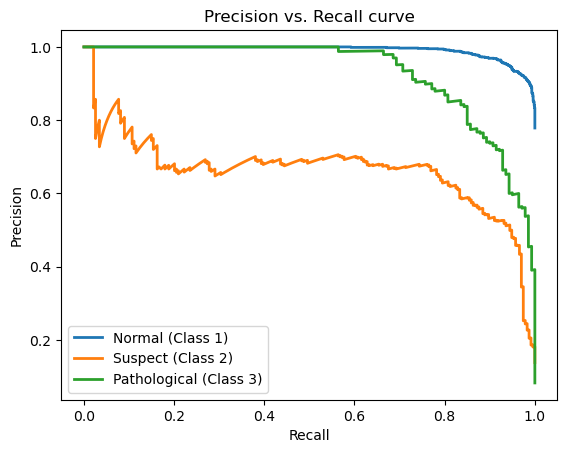

In [43]:
# Converting classes to binary format
y_binarized = label_binarize(y_train, classes=[1, 2, 3])

# Applying multiclass model using One-vs-Rest approach 
# The One-vs-Rest (OvR) approach may handle imbalanced dataset better because each classifier deals with 
# the imbalance between one class and all other classes separately.
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_binarized)

# Calculating precision and recall for each class
precision = dict()
recall = dict()
for i in range(3):
    precision[i], recall[i], _ = precision_recall_curve(y_binarized[:, i], clf.predict_proba(X_train)[:, i])

class_names = ['Normal', 'Suspect', 'Pathological']  # Updated class names
for i in range(3):
    plt.plot(recall[i], precision[i], lw=2, label=f'{class_names[i]} (Class {i+1})')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="best")
plt.title("Precision vs. Recall curve")
plt.show()


For the "Normal" class (Blue curve), both precision and recall values are high, indicating that the model can recognize this class with high accuracy and coverage. For the "Suspect" class (Orange curve), both precision and recall are lower, suggesting that the model struggles to detect this condition. For the "Pathological" class (Green curve), while the model performs well, the precision drops faster compared to recall. These curves expose the consistency of the model in detecting different classes and its sensitivity in the decision-making process. 

In this case, the model demonstrates the best performance for the "Normal" condition, faces challenges with the "Suspect" condition, and offers a reasonable balance for the "Pathological" condition.

### 4.2 Decision Tree

In [44]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [45]:
y_pred_dt = dt_classifier.predict(X_train)

cm_dt = confusion_matrix(y_train, y_pred_dt)
report_dt = classification_report(y_train, y_pred_dt)

print("Confusion Matrix:\n", cm_dt)
print("Classification Report:\n", report_dt)

Confusion Matrix:
 [[1316    0    0]
 [   2  232    0]
 [   0    0  140]]
Classification Report:
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      1316
         2.0       1.00      0.99      1.00       234
         3.0       1.00      1.00      1.00       140

    accuracy                           1.00      1690
   macro avg       1.00      1.00      1.00      1690
weighted avg       1.00      1.00      1.00      1690



In [46]:
accuracy = accuracy_score(y_train, y_pred_dt)
f1 = f1_score(y_train, y_pred_dt, average='weighted')  
recall = recall_score(y_train, y_pred_dt, average='weighted')  
precision = precision_score(y_train, y_pred_dt, average='weighted') 

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

Accuracy: 0.9988165680473373
F1 Score: 0.9988144777845853
Recall: 0.9988165680473373
Precision: 0.998818363846962


Overfitting!

In [47]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Cross-validated predictions
y_pred_dt_cv = cross_val_predict(dt_classifier, X_train, y_train, cv=cv)
cm_dt_cv = confusion_matrix(y_train, y_pred_dt_cv)
report_dt_cv = classification_report(y_train, y_pred_dt_cv)

# Calculation
accuracy_cv_dt = accuracy_score(y_train, y_pred_dt_cv)
f1_cv_dt = f1_score(y_train, y_pred_dt_cv, average='weighted')  # Use 'weighted' for imbalanced classes
recall_cv_dt = recall_score(y_train, y_pred_dt_cv, average='weighted')
precision_cv_dt = precision_score(y_train, y_pred_dt_cv, average='weighted')

print("Confusion Matrix:\n", cm_dt_cv)
print("\nClassification Report:\n", report_dt_cv)
print("\nAccuracy:", accuracy_cv_dt)
print("F1 Score:", f1_cv_dt)
print("Recall:", recall_cv_dt)
print("Precision:", precision_cv_dt)

Confusion Matrix:
 [[1250   55   11]
 [  62  162   10]
 [   8    7  125]]

Classification Report:
               precision    recall  f1-score   support

         1.0       0.95      0.95      0.95      1316
         2.0       0.72      0.69      0.71       234
         3.0       0.86      0.89      0.87       140

    accuracy                           0.91      1690
   macro avg       0.84      0.85      0.84      1690
weighted avg       0.91      0.91      0.91      1690


Accuracy: 0.9094674556213018
F1 Score: 0.9088863472946664
Recall: 0.9094674556213018
Precision: 0.9084658448330735


The model reliably identifies the "Normal" condition with high precision and recall rates, while it struggles to correctly classify the "Suspect" condition, indicated by lower rates. Performance for the "Pathological" condition is better but still lower than for the "Normal" condition. Overall, the model demonstrates high accuracy and F1 scores, indicating a generally good performance, yet there's room for improvement, particularly in classifying the "Suspect" condition.

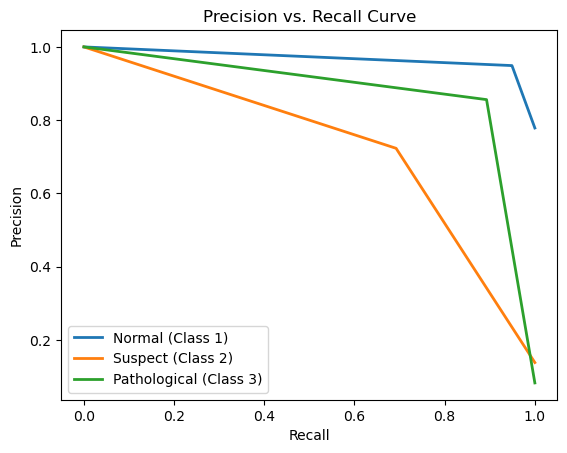

In [48]:
y_probas = cross_val_predict(dt_classifier, X_train, y_train, cv=cv, method='predict_proba')

# Define class names for the plot
class_names = ['Normal', 'Suspect', 'Pathological']

# Calculate precision and recall for each class without binarization
precision_dict = dict()
recall_dict = dict()
threshold_dict = dict()

for i, class_name in enumerate(class_names, start=1):
    binary_y_train = (y_train == i).astype(int)
    precision_dict[class_name], recall_dict[class_name], _ = precision_recall_curve(binary_y_train, y_probas[:, i-1])

    # Plot Precision-Recall curve for each class
    plt.plot(recall_dict[class_name], precision_dict[class_name], lw=2, label=f'{class_name} (Class {i})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs. Recall Curve')
plt.legend(loc='best')
plt.show()

The graph indicates that the model exhibits high precision and coverage for 'Normal' cases, struggles to distinguish 'Suspect' cases, and is quite successful for 'Pathological' cases, albeit with some errors to achieve full coverage. Across all conditions, the model's performance balance varies according to classification thresholds.

### 4.3 Random Forest

In [49]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [50]:
y_pred_train_rf = rf_clf.predict(X_train)

cm_rf = confusion_matrix(y_train, y_pred_train_rf)
cr_rf = classification_report(y_train, y_pred_train_rf)

accuracy_rf = accuracy_score(y_train, y_pred_train_rf)
f1_rf = f1_score(y_train, y_pred_train_rf, average='weighted')
recall_rf = recall_score(y_train, y_pred_train_rf, average='weighted')
precision_rf = precision_score(y_train, y_pred_train_rf, average='weighted')

print("Confusion Matrix:\n", cm_rf)
print("\nClassification Report:\n", cr_rf)
print("\nAccuracy:", accuracy_rf)
print("F1 Score:", f1_rf)
print("Recall:", recall_rf)
print("Precision:", precision_rf)

Confusion Matrix:
 [[1315    1    0]
 [   1  233    0]
 [   0    0  140]]

Classification Report:
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      1316
         2.0       1.00      1.00      1.00       234
         3.0       1.00      1.00      1.00       140

    accuracy                           1.00      1690
   macro avg       1.00      1.00      1.00      1690
weighted avg       1.00      1.00      1.00      1690


Accuracy: 0.9988165680473373
F1 Score: 0.9988165680473373
Recall: 0.9988165680473373
Precision: 0.9988165680473373


Overfitting!

In [51]:
# StratifiedKFold with 10 splits
stratified_kfold_rf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
y_pred_cv = cross_val_predict(rf_clf, X_train, y_train, cv=stratified_kfold_rf)

conf_matrix_rf_cv = confusion_matrix(y_train, y_pred_cv)
classif_report_rf_cv = classification_report(y_train, y_pred_cv)

accuracy_rf = accuracy_score(y_train, y_pred_cv)
f1_rf = f1_score(y_train, y_pred_cv, average='weighted')
recall_rf = recall_score(y_train, y_pred_cv, average='weighted')
precision_rf = precision_score(y_train, y_pred_cv, average='weighted')

print("Confusion Matrix:\n", conf_matrix_rf_cv)
print("\nClassification Report:\n", classif_report_rf_cv)
print("\nAccuracy:", accuracy_rf)
print("F1 Score:", f1_rf)
print("Recall:", recall_rf)
print("Precision:", precision_rf)

Confusion Matrix:
 [[1296   15    5]
 [  60  170    4]
 [   8    7  125]]

Classification Report:
               precision    recall  f1-score   support

         1.0       0.95      0.98      0.97      1316
         2.0       0.89      0.73      0.80       234
         3.0       0.93      0.89      0.91       140

    accuracy                           0.94      1690
   macro avg       0.92      0.87      0.89      1690
weighted avg       0.94      0.94      0.94      1690


Accuracy: 0.9414201183431953
F1 Score: 0.9392223960705008
Recall: 0.9414201183431953
Precision: 0.9397499862734947


This output presents the performance of a Random Forest model trained using stratified k-fold cross-validation. The model demonstrates high precision and recall rates for the "Normal" condition (Class 1), indicating it can identify this class with high accuracy and has few false negatives. For the "Suspect" condition (Class 2), both precision and recall are lower compared to the "Normal" condition, suggesting some challenges in detecting this state. The performance on the "Pathological" condition (Class 3) is good, with slightly lower precision than the "Normal" condition but still achieving a high recall rate. The overall accuracy rate is 94%, with an F1 score of 94%, a recall of 94%, and a precision of 94%, indicating a high level of overall classification success across all three classes. Macro average values show a slight decrease to 87% for both accuracy and recall and 89% for F1 score, indicating that when assessing the performance evenly across all classes, there's a slight drop, but it still represents good performance overall.

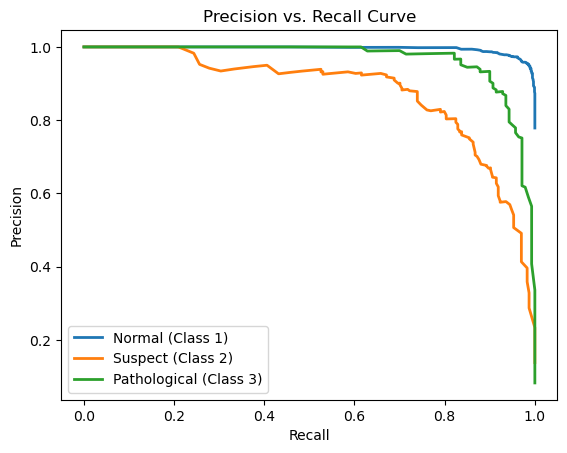

In [52]:
y_probas_rf = cross_val_predict(rf_clf, X_train, y_train, cv=cv, method='predict_proba')

# Defining class names for the plot
class_names = ['Normal', 'Suspect', 'Pathological']

# Calculating precision and recall for each class without binarization
precision_dict = dict()
recall_dict = dict()
threshold_dict = dict()

for i, class_name in enumerate(class_names, start=1):
    binary_y_train = (y_train == i).astype(int)
    precision_dict[class_name], recall_dict[class_name], _ = precision_recall_curve(binary_y_train, y_probas_rf[:, i-1])

    # Precision-Recall curve for each class
    plt.plot(recall_dict[class_name], precision_dict[class_name], lw=2, label=f'{class_name} (Class {i})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs. Recall Curve')
plt.legend(loc='best')
plt.show()

The Precision vs. Recall Curve indicates that it performs very well in identifying the "Normal" class with high precision and recall, struggles somewhat with the "Suspect" class, and exhibits a trade-off between capturing the majority of the "Pathological" cases and incurring more false positives. The model's effectiveness varies across classes, excelling at identifying "Normal" instances but needing improvement for the more critical "Suspect" and "Pathological" categories.

### 4.4 SGD

In [53]:
sgd_clf = SGDClassifier(loss='log_loss', random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(loss='log_loss', random_state=42)

In [54]:
y_pred_train_sgd = sgd_clf.predict(X_train)

cm_sgd = confusion_matrix(y_train, y_pred_train_sgd)
cr_sgd = classification_report(y_train, y_pred_train_sgd)

accuracy_sgd = accuracy_score(y_train, y_pred_train_sgd)
f1_sgd = f1_score(y_train, y_pred_train_sgd, average='weighted')
recall_sgd = recall_score(y_train, y_pred_train_sgd, average='weighted')
precision_sgd = precision_score(y_train, y_pred_train_sgd, average='weighted')

print("Confusion Matrix:\n", cm_sgd)
print("\nClassification Report:\n", cr_sgd)
print("\nAccuracy:", accuracy_sgd)
print("F1 Score:", f1_sgd)
print("Recall:", recall_sgd)
print("Precision:", precision_sgd)

Confusion Matrix:
 [[1283   26    7]
 [ 111   95   28]
 [  10    9  121]]

Classification Report:
               precision    recall  f1-score   support

         1.0       0.91      0.97      0.94      1316
         2.0       0.73      0.41      0.52       234
         3.0       0.78      0.86      0.82       140

    accuracy                           0.89      1690
   macro avg       0.81      0.75      0.76      1690
weighted avg       0.88      0.89      0.87      1690


Accuracy: 0.8869822485207101
F1 Score: 0.8746115343626655
Recall: 0.8869822485207101
Precision: 0.8770259107537214


The model accurately identifies the "Normal" category with high precision and recall, while significantly lower recall for the "Suspect" category suggests challenges in accurately detecting this class. For the "Pathological" class, the precision and recall are more balanced, indicating a reasonably good performance by the model. Overall, while the model performs at acceptable levels, there appears to be a need for improvement in correctly identifying the "Suspect" class.

In [55]:
# StratifiedKFold with 10 splits
stratified_kfold_sgd = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
y_pred_cv_sgd = cross_val_predict(sgd_clf, X_train, y_train, cv=stratified_kfold_sgd)

conf_matrix_sgd_cv = confusion_matrix(y_train, y_pred_cv_sgd)
classif_report_sgd_cv = classification_report(y_train, y_pred_cv_sgd)

accuracy_sgd_cv = accuracy_score(y_train, y_pred_cv_sgd)
f1_sgd_cv = f1_score(y_train, y_pred_cv_sgd, average='weighted')
recall_sgd_cv = recall_score(y_train, y_pred_cv_sgd, average='weighted')
precision_sgd_cv = precision_score(y_train, y_pred_cv_sgd, average='weighted')

print("Confusion Matrix:\n", conf_matrix_sgd_cv)
print("\nClassification Report:\n", classif_report_sgd_cv)
print("\nAccuracy:", accuracy_sgd_cv)
print("F1 Score:", f1_sgd_cv)
print("Recall:", recall_sgd_cv)
print("Precision:", precision_sgd_cv)

Confusion Matrix:
 [[1260   49    7]
 [  83  136   15]
 [  10   21  109]]

Classification Report:
               precision    recall  f1-score   support

         1.0       0.93      0.96      0.94      1316
         2.0       0.66      0.58      0.62       234
         3.0       0.83      0.78      0.80       140

    accuracy                           0.89      1690
   macro avg       0.81      0.77      0.79      1690
weighted avg       0.89      0.89      0.89      1690


Accuracy: 0.8905325443786982
F1 Score: 0.8874599144780889
Recall: 0.8905325443786982
Precision: 0.8855131501550761


This output indicates that the "Normal" condition is well-recognized with very high precision and recall rates. However, for the "Suspect" condition, both precision and recall rates are relatively low, suggesting some difficulties in identifying this class. Compared to the previous output, this result provides slightly higher precision for the "Pathological" condition, while showing a similar overall accuracy and F1 score performance.

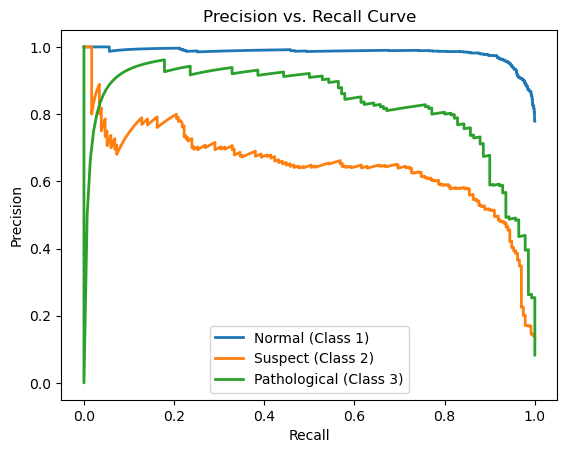

In [56]:
y_probas_sgd = cross_val_predict(sgd_clf, X_train, y_train, cv=stratified_kfold_sgd, method='predict_proba')

# Defining class names for the plot
class_names = ['Normal', 'Suspect', 'Pathological']

# Calculating precision and recall for each class without binarization
precision_dict = dict()
recall_dict = dict()
threshold_dict = dict()

for i, class_name in enumerate(class_names, start=1):
    binary_y_train = (y_train == i).astype(int)
    precision_dict[class_name], recall_dict[class_name], _ = precision_recall_curve(binary_y_train, y_probas_sgd[:, i-1])

    # Precision-Recall curve for each class
    plt.plot(recall_dict[class_name], precision_dict[class_name], lw=2, label=f'{class_name} (Class {i})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs. Recall Curve')
plt.legend(loc='best')
plt.show()

The model identifies the "Normal" class with high precision and recall, as indicated by the blue curve, which remains close to the top-right corner, signifying high accuracy in detecting this class. The orange curve for the "Suspect" class shows a significant trade-off between precision and recall, indicating challenges in distinguishing this class accurately. The "Pathological" class, represented by the green curve, shows a balanced precision-recall performance but with a steep drop, suggesting a decline in precision at higher recall levels.

### 4.5 XGBoost

In [57]:
y_train_encoded = y_train - 1  # Our target's labels starts with '1' for this reason we need to re-encode our labels
xgb_clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_clf.fit(X_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [58]:
y_pred_train_xgb = xgb_clf.predict(X_train)

cm_xgb = confusion_matrix(y_train_encoded, y_pred_train_xgb)
cr_xgb = classification_report(y_train_encoded, y_pred_train_xgb)

accuracy_xgb = accuracy_score(y_train_encoded, y_pred_train_xgb)
f1_xgb = f1_score(y_train_encoded, y_pred_train_xgb, average='weighted')
recall_xgb = recall_score(y_train_encoded, y_pred_train_xgb, average='weighted')
precision_xgb = precision_score(y_train_encoded, y_pred_train_xgb, average='weighted')

print("Confusion Matrix:\n", cm_xgb)
print("\nClassification Report:\n", cr_xgb)
print("\nAccuracy:", accuracy_xgb)
print("F1 Score:", f1_xgb)
print("Recall:", recall_xgb)
print("Precision:", precision_xgb)

Confusion Matrix:
 [[1315    1    0]
 [   1  233    0]
 [   0    0  140]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1316
         1.0       1.00      1.00      1.00       234
         2.0       1.00      1.00      1.00       140

    accuracy                           1.00      1690
   macro avg       1.00      1.00      1.00      1690
weighted avg       1.00      1.00      1.00      1690


Accuracy: 0.9988165680473373
F1 Score: 0.9988165680473373
Recall: 0.9988165680473373
Precision: 0.9988165680473373


It seems overfitting appeared.

In [59]:
# StratifiedKFold with 20 splits
stratified_kfold_xgb = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)
y_pred_cv_xgb = cross_val_predict(xgb_clf, X_train, y_train_encoded, cv=stratified_kfold_xgb)

conf_matrix_xgb_cv = confusion_matrix(y_train_encoded, y_pred_cv_xgb)
classif_report_xgb_cv = classification_report(y_train_encoded, y_pred_cv_xgb)

accuracy_xgb_cv = accuracy_score(y_train_encoded, y_pred_cv_xgb)
f1_xgb_cv = f1_score(y_train_encoded, y_pred_cv_xgb, average='weighted')
recall_xgb_cv = recall_score(y_train_encoded, y_pred_cv_xgb, average='weighted')
precision_xgb_cv = precision_score(y_train_encoded, y_pred_cv_xgb, average='weighted')

print("Confusion Matrix:\n", conf_matrix_xgb_cv)
print("\nClassification Report:\n", classif_report_xgb_cv)
print("\nAccuracy:", accuracy_xgb_cv)
print("F1 Score:", f1_xgb_cv)
print("Recall:", recall_xgb_cv)
print("Precision:", precision_xgb_cv)

Confusion Matrix:
 [[1288   24    4]
 [  44  185    5]
 [   9    5  126]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1316
         1.0       0.86      0.79      0.83       234
         2.0       0.93      0.90      0.92       140

    accuracy                           0.95      1690
   macro avg       0.92      0.89      0.90      1690
weighted avg       0.94      0.95      0.95      1690


Accuracy: 0.9461538461538461
F1 Score: 0.9452253884834368
Recall: 0.9461538461538461
Precision: 0.944937547277132


The model accurately identifies the "Normal" class with high precision and recall, indicating few false positives and negatives. For the "Suspect" and "Pathological" classes, it also shows high precision and recall, demonstrating the model's reliability in identifying these classes. The overall accuracy, F1 score, recall, and precision are high, suggesting that the model performs well and consistently across all classes.

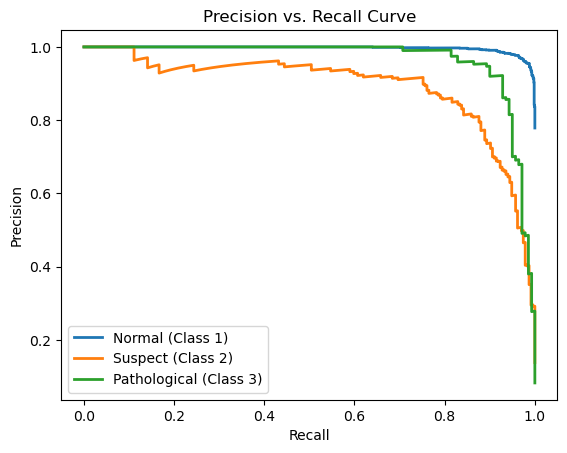

In [60]:
y_probas_xgb = cross_val_predict(xgb_clf, X_train, y_train_encoded, cv=stratified_kfold_xgb, method='predict_proba')

# Define class names for the plot
class_names = ['Normal', 'Suspect', 'Pathological']

# Calculate precision and recall for each class
precision = dict()
recall = dict()
for i in range(len(class_names)):
    precision[i], recall[i], _ = precision_recall_curve(y_train_encoded == i, y_probas_xgb[:, i])

# Plot the Precision-Recall curve for each class
for i in range(len(class_names)):
    plt.plot(recall[i], precision[i], lw=2, label=f'{class_names[i]} (Class {i+1})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs. Recall Curve')
plt.legend(loc='best')
plt.show()


This precision-recall curve indicates that the model has near-perfect precision and recall for the "Normal" condition, signifying accurate detection with few false positives and negatives. For the "Suspect" condition, the model maintains high precision up to a certain threshold, after which precision declines as recall decreases. For the "Pathological" condition, the model shows both high precision and recall, indicating a strong classification performance.

### 4.6 Support Vector Machine (SVM)

In [61]:
svc_clf = SVC(kernel='linear', probability=True, random_state=42)
ovr_clf = OneVsRestClassifier(svc_clf)
ovr_clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC(kernel='linear', probability=True,
                                  random_state=42))

In [62]:
y_pred_train_svc = ovr_clf.predict(X_train)

cm_svc = confusion_matrix(y_train, y_pred_train_svc)
cr_svc = classification_report(y_train, y_pred_train_svc)

accuracy_svc = accuracy_score(y_train, y_pred_train_svc)
f1_svc = f1_score(y_train, y_pred_train_svc, average='weighted')
recall_svc = recall_score(y_train, y_pred_train_svc, average='weighted')
precision_svc = precision_score(y_train, y_pred_train_svc, average='weighted')

print("Confusion Matrix:\n", cm_svc)
print("\nClassification Report:\n", cr_svc)
print("\nAccuracy:", accuracy_svc)
print("F1 Score:", f1_svc)
print("Recall:", recall_svc)
print("Precision:", precision_svc)

Confusion Matrix:
 [[1263   47    6]
 [  63  166    5]
 [  10   28  102]]

Classification Report:
               precision    recall  f1-score   support

         1.0       0.95      0.96      0.95      1316
         2.0       0.69      0.71      0.70       234
         3.0       0.90      0.73      0.81       140

    accuracy                           0.91      1690
   macro avg       0.85      0.80      0.82      1690
weighted avg       0.91      0.91      0.91      1690


Accuracy: 0.9059171597633137
F1 Score: 0.9052746584773784
Recall: 0.9059171597633137
Precision: 0.906297585221125


Similar to previous models, the 'Normal' class was predicted quite well, but the 'Suspect' and 'Pathological' classes appeared to have lower accuracy and recall rates.

In [63]:
# StratifiedKFold with 20 splits
stratified_kfold_svm = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)
y_pred_cv_svm = cross_val_predict(ovr_clf, X_train, y_train, cv=stratified_kfold_svm)

conf_matrix_svm_cv = confusion_matrix(y_train, y_pred_cv_svm)
classif_report_svm_cv = classification_report(y_train, y_pred_cv_svm)

accuracy_svm_cv = accuracy_score(y_train, y_pred_cv_svm)
f1_svm_cv = f1_score(y_train, y_pred_cv_svm, average='weighted')
recall_svm_cv = recall_score(y_train, y_pred_cv_svm, average='weighted')
precision_svm_cv = precision_score(y_train, y_pred_cv_svm, average='weighted')

print("Confusion Matrix:\n", conf_matrix_svm_cv)
print("\nClassification Report:\n", classif_report_svm_cv)
print("\nAccuracy:", accuracy_svm_cv)
print("F1 Score:", f1_svm_cv)
print("Recall:", recall_svm_cv)
print("Precision:", precision_svm_cv)

Confusion Matrix:
 [[1260   50    6]
 [  66  163    5]
 [  13   30   97]]

Classification Report:
               precision    recall  f1-score   support

         1.0       0.94      0.96      0.95      1316
         2.0       0.67      0.70      0.68       234
         3.0       0.90      0.69      0.78       140

    accuracy                           0.90      1690
   macro avg       0.84      0.78      0.80      1690
weighted avg       0.90      0.90      0.90      1690


Accuracy: 0.8994082840236687
F1 Score: 0.89853574147743
Recall: 0.8994082840236687
Precision: 0.9000359091874


Overall, while the model's performance is high, it appears that further improvements are needed for the 'Suspect' and 'Pathological' classes. Compared to the previous output, these results indicate that the model is consistent and exhibits similar trends in both cases.

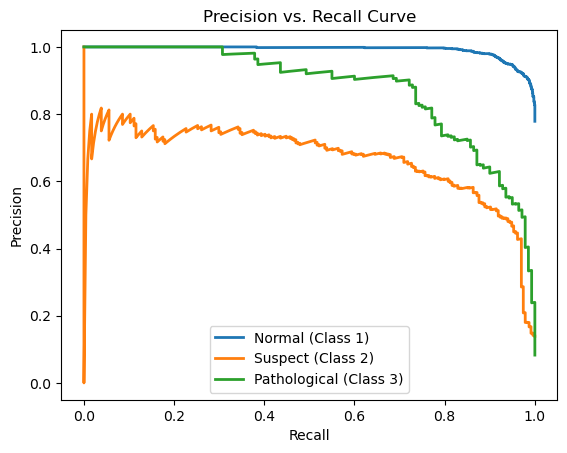

In [64]:
y_probas_svm = cross_val_predict(ovr_clf, X_train, y_train, cv=stratified_kfold_svm, method='predict_proba')

# Define class names for the plot
class_names = ['Normal', 'Suspect', 'Pathological']

# Calculate precision and recall for each class
precision = dict()
recall = dict()
thresholds = dict()

# We need to adjust for this when indexing into y_probas_svm.
for i, class_label in enumerate([1, 2, 3], start=0):
    precision[i], recall[i], thresholds[i] = precision_recall_curve(
        (y_train == class_label).astype(int), y_probas_svm[:, i])

# Plot the Precision-Recall curve for each class
for i, class_name in enumerate(class_names, start=0):
    plt.plot(recall[i], precision[i], lw=2, label=f'{class_name} (Class {i+1})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs. Recall Curve')
plt.legend(loc='best')
plt.show()


### 4.7 MLP

Epoch 1/50


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


136/136 - 0s - 3ms/step - accuracy: 0.8373 - loss: 0.5530 - val_accuracy: 0.8609 - val_loss: 0.3727
Epoch 2/50
136/136 - 0s - 385us/step - accuracy: 0.8883 - loss: 0.3002 - val_accuracy: 0.8698 - val_loss: 0.3170
Epoch 3/50
136/136 - 0s - 389us/step - accuracy: 0.8964 - loss: 0.2601 - val_accuracy: 0.8905 - val_loss: 0.2922
Epoch 4/50
136/136 - 0s - 413us/step - accuracy: 0.9112 - loss: 0.2303 - val_accuracy: 0.8905 - val_loss: 0.2731
Epoch 5/50
136/136 - 0s - 421us/step - accuracy: 0.9142 - loss: 0.2117 - val_accuracy: 0.8846 - val_loss: 0.2676
Epoch 6/50
136/136 - 0s - 444us/step - accuracy: 0.9135 - loss: 0.2057 - val_accuracy: 0.8964 - val_loss: 0.2535
Epoch 7/50
136/136 - 0s - 406us/step - accuracy: 0.9253 - loss: 0.1878 - val_accuracy: 0.9083 - val_loss: 0.2417
Epoch 8/50
136/136 - 0s - 414us/step - accuracy: 0.9268 - loss: 0.1816 - val_accuracy: 0.9142 - val_loss: 0.2406
Epoch 9/50
136/136 - 0s - 402us/step - accuracy: 0.9297 - loss: 0.1723 - val_accuracy: 0.9024 - val_loss: 0.2

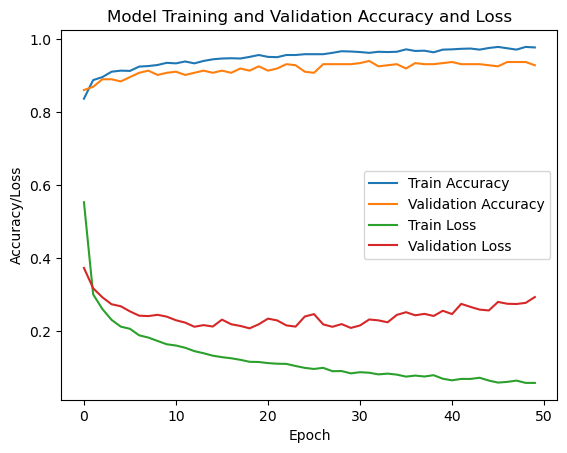

In [65]:
# Convert y_train to categorical format
y_train_categorical = to_categorical(y_train)

# Split the training set into training and validation sets
X_train, X_val, y_train_categorical, y_val_categorical = train_test_split(
    X_train, y_train_categorical, test_size=0.2, stratify=y_train_categorical.argmax(axis=1), random_state=42)

# Creating the model
model1 = Sequential()
model1.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(y_train_categorical.shape[1], activation='softmax'))  

# Compiling
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model and testing on the validation set
history = model1.fit(X_train, y_train_categorical, validation_data=(X_val, y_val_categorical), epochs=50, batch_size=10, verbose=2)

# Evaluating the model (on both training and validation sets)
y_pred_train = model1.predict(X_train)
y_pred_train_classes = np.argmax(y_pred_train, axis=1)
y_train_classes = np.argmax(y_train_categorical, axis=1)

y_pred_val = model1.predict(X_val)
y_pred_val_classes = np.argmax(y_pred_val, axis=1)
y_val_classes = np.argmax(y_val_categorical, axis=1)

# Performance metrics (Training set)
print("Training Set Performance:")
print("Confusion Matrix:")
print(confusion_matrix(y_train_classes, y_pred_train_classes))
print("Classification Report:")
print(classification_report(y_train_classes, y_pred_train_classes))
print("Accuracy Score:", accuracy_score(y_train_classes, y_pred_train_classes))
print("F1 Score:", f1_score(y_train_classes, y_pred_train_classes, average='weighted'))
print("Recall Score:", recall_score(y_train_classes, y_pred_train_classes, average='weighted'))
print("Precision Score:", precision_score(y_train_classes, y_pred_train_classes, average='weighted'))

# Performance metrics (Validation set)
print("\nValidation Set Performance:")
print("Confusion Matrix:")
print(confusion_matrix(y_val_classes, y_pred_val_classes))
print("Classification Report:")
print(classification_report(y_val_classes, y_pred_val_classes))
print("Accuracy Score:", accuracy_score(y_val_classes, y_pred_val_classes))
print("F1 Score:", f1_score(y_val_classes, y_pred_val_classes, average='weighted'))
print("Recall Score:", recall_score(y_val_classes, y_pred_val_classes, average='weighted'))
print("Precision Score:", precision_score(y_val_classes, y_pred_val_classes, average='weighted'))

# Visualizing the training process
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training and Validation Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()


The model's training set results show that it distinguishes between 'normal', 'suspect', and 'pathological' classes with high precision, as indicated by the elevated accuracy and F1 scores. On the other hand, the validation set outcomes reveal a diminution in performance, particularly for 'suspect' and 'pathological' categories, which hints at issues in the model's generalization to unseen data. Through the course of training, the loss graph demonstrates a consistent decline, and accuracy improves steadily. However, an uptick in the validation loss suggests the beginnings of overfitting. Nonetheless, the validation accuracy sustains a high level, which signifies that the model generally maintains its discriminative power. In sum, although signs of incipient overfitting are present, the overall efficacy of the model is substantial.

### Dropout

Epoch 1/50


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


80/80 - 0s - 6ms/step - accuracy: 0.3225 - loss: 1.1085 - val_accuracy: 0.3050 - val_loss: 1.1012
Epoch 2/50
80/80 - 0s - 558us/step - accuracy: 0.3663 - loss: 1.1009 - val_accuracy: 0.3450 - val_loss: 1.1010
Epoch 3/50
80/80 - 0s - 503us/step - accuracy: 0.3113 - loss: 1.1042 - val_accuracy: 0.2850 - val_loss: 1.1048
Epoch 4/50
80/80 - 0s - 473us/step - accuracy: 0.3487 - loss: 1.0992 - val_accuracy: 0.3050 - val_loss: 1.1023
Epoch 5/50
80/80 - 0s - 506us/step - accuracy: 0.3587 - loss: 1.0978 - val_accuracy: 0.3050 - val_loss: 1.1051
Epoch 6/50
80/80 - 0s - 523us/step - accuracy: 0.3525 - loss: 1.0945 - val_accuracy: 0.2950 - val_loss: 1.1025
Epoch 7/50
80/80 - 0s - 539us/step - accuracy: 0.3700 - loss: 1.0926 - val_accuracy: 0.3300 - val_loss: 1.1053
Epoch 8/50
80/80 - 0s - 542us/step - accuracy: 0.3725 - loss: 1.0924 - val_accuracy: 0.3200 - val_loss: 1.1059
Epoch 9/50
80/80 - 0s - 505us/step - accuracy: 0.3875 - loss: 1.0921 - val_accuracy: 0.3200 - val_loss: 1.1052
Epoch 10/50
80

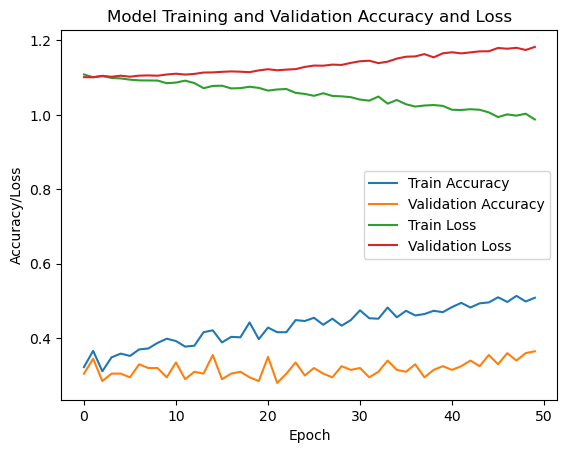

In [66]:
# Sample dataset
X_d = np.random.rand(1000, 10)  # 1000 samples, 10 features
y_d = np.random.randint(0, 3, 1000)  # 0, 1, 2 classes

# Convert y_train to categorical format
y_categorical = to_categorical(y_d)

X_train_d, X_val, y_train_categorical, y_val_categorical = train_test_split(
    X_d, y_categorical, test_size=0.2, stratify=y_d, random_state=42)

def create_model():
    # Creating the model
    model = Sequential([
        Dense(64, input_dim=X_train_d.shape[1], activation='relu'),
        Dropout(0.2),  # Adding dropout
        Dense(32, activation='relu'),
        Dropout(0.2),  # Adding dropout
        Dense(y_train_categorical.shape[1], activation='softmax')
    ])
    # Compiling the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Create and train the model
model = create_model()
history = model.fit(X_train_d, y_train_categorical, validation_data=(X_val, y_val_categorical), epochs=50, batch_size=10, verbose=2)

# Evaluating the model (on training and validation sets)
def evaluate_model(model, X_train_d, y_train_categorical, X_val, y_val_categorical):
    y_pred_train = model.predict(X_train_d)
    y_pred_train_classes = np.argmax(y_pred_train, axis=1)
    y_train_classes = np.argmax(y_train_categorical, axis=1)

    y_pred_val = model.predict(X_val)
    y_pred_val_classes = np.argmax(y_pred_val, axis=1)
    y_val_classes = np.argmax(y_val_categorical, axis=1)

    # Performance metrics (Training set)
    print("Training Set Performance:")
    print("Confusion Matrix:")
    print(confusion_matrix(y_train_classes, y_pred_train_classes))
    print("Classification Report:")
    print(classification_report(y_train_classes, y_pred_train_classes))
    print("Accuracy Score:", accuracy_score(y_train_classes, y_pred_train_classes))
    print("F1 Score:", f1_score(y_train_classes, y_pred_train_classes, average='weighted'))
    print("Recall Score:", recall_score(y_train_classes, y_pred_train_classes, average='weighted'))
    print("Precision Score:", precision_score(y_train_classes, y_pred_train_classes, average='weighted'))

    # Performance metrics (Validation set)
    print("\nValidation Set Performance:")
    print("Confusion Matrix:")
    print(confusion_matrix(y_val_classes, y_pred_val_classes))
    print("Classification Report:")
    print(classification_report(y_val_classes, y_pred_val_classes))
    print("Accuracy Score:", accuracy_score(y_val_classes, y_pred_val_classes))
    print("F1 Score:", f1_score(y_val_classes, y_pred_val_classes, average='weighted'))
    print("Recall Score:", recall_score(y_val_classes, y_pred_val_classes, average='weighted'))
    print("Precision Score:", precision_score(y_val_classes, y_pred_val_classes, average='weighted'))

    # Visualizing the training process
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Training and Validation Accuracy and Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy/Loss')
    plt.legend()
    plt.show()

evaluate_model(model, X_train_d, y_train_categorical, X_val, y_val_categorical)


The performance of the model with dropout applied is lower compared to the base model. The training and validation losses are higher, and the accuracy is lower. This situation may indicate that the dropout has excessively constrained the model or that the model is not sufficiently large or complex. Dropout is typically used to prevent overfitting, but here, it seems that the model is experiencing insufficient learning. In other words, while some overfitting is observed in the base model, underfitting may be present in the model with dropout applied.

### Learning Rate

Epoch 1/50


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


80/80 - 0s - 4ms/step - accuracy: 0.3187 - loss: 1.1083 - val_accuracy: 0.2850 - val_loss: 1.1090
Epoch 2/50
80/80 - 0s - 521us/step - accuracy: 0.3550 - loss: 1.0982 - val_accuracy: 0.2850 - val_loss: 1.1070
Epoch 3/50
80/80 - 0s - 524us/step - accuracy: 0.3638 - loss: 1.0943 - val_accuracy: 0.2850 - val_loss: 1.1075
Epoch 4/50
80/80 - 0s - 486us/step - accuracy: 0.3675 - loss: 1.0882 - val_accuracy: 0.3150 - val_loss: 1.1104
Epoch 5/50
80/80 - 0s - 504us/step - accuracy: 0.3887 - loss: 1.0888 - val_accuracy: 0.3000 - val_loss: 1.1115
Epoch 6/50
80/80 - 0s - 506us/step - accuracy: 0.4050 - loss: 1.0843 - val_accuracy: 0.2950 - val_loss: 1.1160
Epoch 7/50
80/80 - 0s - 475us/step - accuracy: 0.3913 - loss: 1.0834 - val_accuracy: 0.2900 - val_loss: 1.1141
Epoch 8/50
80/80 - 0s - 436us/step - accuracy: 0.3988 - loss: 1.0805 - val_accuracy: 0.3050 - val_loss: 1.1174
Epoch 9/50
80/80 - 0s - 430us/step - accuracy: 0.4013 - loss: 1.0763 - val_accuracy: 0.2550 - val_loss: 1.1216
Epoch 10/50
80

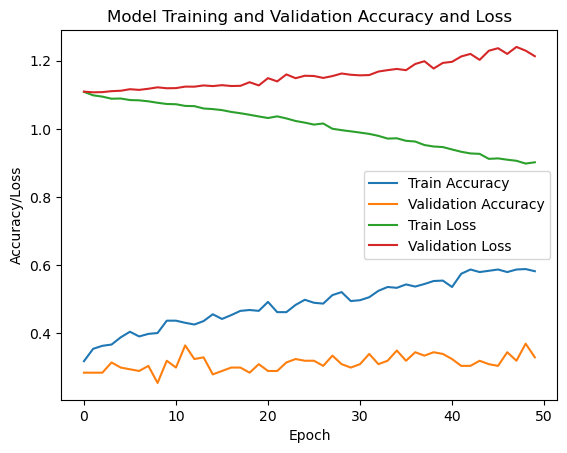

In [67]:
def create_model(learning_rate=0.001):
    model = Sequential([
        Dense(64, input_dim=X_train_d.shape[1], activation='relu'),
        Dense(32, activation='relu'),
        Dense(y_train_categorical.shape[1], activation='softmax')
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


model = create_model(learning_rate=0.0009)  

history = model.fit(
    X_train_d, y_train_categorical, 
    validation_data=(X_val, y_val_categorical),
    epochs=50, 
    batch_size=10, 
    verbose=2
)


def evaluate_model(model, X_train_d, y_train_categorical, X_val, y_val_categorical):
    y_pred_train = model.predict(X_train_d)
    y_pred_train_classes = np.argmax(y_pred_train, axis=1)
    y_train_classes = np.argmax(y_train_categorical, axis=1)

    y_pred_val = model.predict(X_val)
    y_pred_val_classes = np.argmax(y_pred_val, axis=1)
    y_val_classes = np.argmax(y_val_categorical, axis=1)

    print("Training Set Performance:")
    print("Confusion Matrix:")
    print(confusion_matrix(y_train_classes, y_pred_train_classes))
    print("Classification Report:")
    print(classification_report(y_train_classes, y_pred_train_classes))
    print("Accuracy Score:", accuracy_score(y_train_classes, y_pred_train_classes))
    print("F1 Score:", f1_score(y_train_classes, y_pred_train_classes, average='weighted'))
    print("Recall Score:", recall_score(y_train_classes, y_pred_train_classes, average='weighted'))
    print("Precision Score:", precision_score(y_train_classes, y_pred_train_classes, average='weighted'))

    print("\nValidation Set Performance:")
    print("Confusion Matrix:")
    print(confusion_matrix(y_val_classes, y_pred_val_classes))
    print("Classification Report:")
    print(classification_report(y_val_classes, y_pred_val_classes))
    print("Accuracy Score:", accuracy_score(y_val_classes, y_pred_val_classes))
    print("F1 Score:", f1_score(y_val_classes, y_pred_val_classes, average='weighted'))
    print("Recall Score:", recall_score(y_val_classes, y_pred_val_classes, average='weighted'))
    print("Precision Score:", precision_score(y_val_classes, y_pred_val_classes, average='weighted'))

   
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Training and Validation Accuracy and Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy/Loss')
    plt.legend()
    plt.show()

evaluate_model(model, X_train_d, y_train_categorical, X_val, y_val_categorical)


While the base model exhibits high training accuracy and a certain degree of overfitting, the model with a low learning rate seems to be experiencing underfitting. A low learning rate may mean that the model is not updating its weights quickly enough, which could prevent it from capturing more complex patterns.

### Ridge(L2)

Epoch 1/50


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


80/80 - 0s - 5ms/step - accuracy: 0.3325 - loss: 1.6067 - val_accuracy: 0.3900 - val_loss: 1.4771
Epoch 2/50
80/80 - 0s - 456us/step - accuracy: 0.3550 - loss: 1.3951 - val_accuracy: 0.3400 - val_loss: 1.3288
Epoch 3/50
80/80 - 0s - 485us/step - accuracy: 0.3587 - loss: 1.2830 - val_accuracy: 0.3200 - val_loss: 1.2505
Epoch 4/50
80/80 - 0s - 519us/step - accuracy: 0.3388 - loss: 1.2207 - val_accuracy: 0.3150 - val_loss: 1.2033
Epoch 5/50
80/80 - 0s - 507us/step - accuracy: 0.3675 - loss: 1.1826 - val_accuracy: 0.3350 - val_loss: 1.1719
Epoch 6/50
80/80 - 0s - 512us/step - accuracy: 0.3625 - loss: 1.1584 - val_accuracy: 0.3600 - val_loss: 1.1521
Epoch 7/50
80/80 - 0s - 526us/step - accuracy: 0.3450 - loss: 1.1417 - val_accuracy: 0.3500 - val_loss: 1.1375
Epoch 8/50
80/80 - 0s - 491us/step - accuracy: 0.3600 - loss: 1.1306 - val_accuracy: 0.3600 - val_loss: 1.1273
Epoch 9/50
80/80 - 0s - 477us/step - accuracy: 0.3613 - loss: 1.1217 - val_accuracy: 0.3300 - val_loss: 1.1198
Epoch 10/50
80

/Users/alperenunal/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

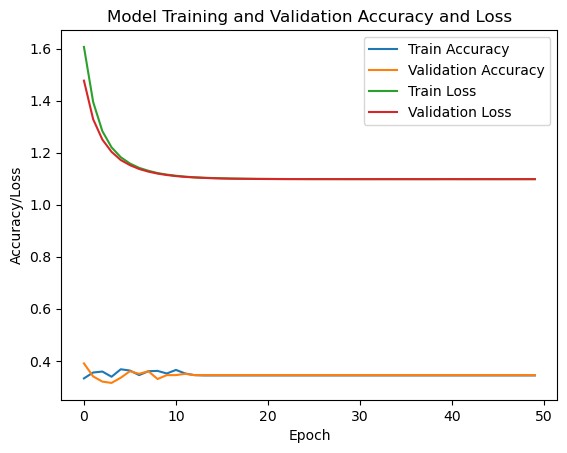

In [68]:
def create_model(l2_lambda=0.002):
    model = Sequential([
        Dense(64, input_dim=X_train_d.shape[1], activation='relu', kernel_regularizer=l2(l2_lambda)),
        Dense(32, activation='relu', kernel_regularizer=l2(l2_lambda)),
        Dense(y_train_categorical.shape[1], activation='softmax', kernel_regularizer=l2(l2_lambda))
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


model = create_model(l2_lambda=0.01)  # Ridge regulation parameter
history = model.fit(X_train_d, y_train_categorical, validation_data=(X_val, y_val_categorical),
                    epochs=50, batch_size=10, verbose=2)

evaluate_model(model, X_train_d, y_train_categorical, X_val, y_val_categorical)


This model, just like other regulated models, is very low in performance compared to our first mlp model.

### Lasso(L1)

Epoch 1/50


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


80/80 - 0s - 5ms/step - accuracy: 0.3175 - loss: 1.4278 - val_accuracy: 0.3650 - val_loss: 1.3813
Epoch 2/50
80/80 - 0s - 535us/step - accuracy: 0.3413 - loss: 1.3381 - val_accuracy: 0.2750 - val_loss: 1.3140
Epoch 3/50
80/80 - 0s - 541us/step - accuracy: 0.3562 - loss: 1.2797 - val_accuracy: 0.3500 - val_loss: 1.2674
Epoch 4/50
80/80 - 0s - 506us/step - accuracy: 0.3713 - loss: 1.2442 - val_accuracy: 0.3150 - val_loss: 1.2444
Epoch 5/50
80/80 - 0s - 514us/step - accuracy: 0.3862 - loss: 1.2211 - val_accuracy: 0.3050 - val_loss: 1.2280
Epoch 6/50
80/80 - 0s - 541us/step - accuracy: 0.3900 - loss: 1.2052 - val_accuracy: 0.3350 - val_loss: 1.2117
Epoch 7/50
80/80 - 0s - 497us/step - accuracy: 0.3862 - loss: 1.1922 - val_accuracy: 0.2850 - val_loss: 1.2041
Epoch 8/50
80/80 - 0s - 527us/step - accuracy: 0.3925 - loss: 1.1809 - val_accuracy: 0.3050 - val_loss: 1.1934
Epoch 9/50
80/80 - 0s - 475us/step - accuracy: 0.3812 - loss: 1.1730 - val_accuracy: 0.3100 - val_loss: 1.1853
Epoch 10/50
80

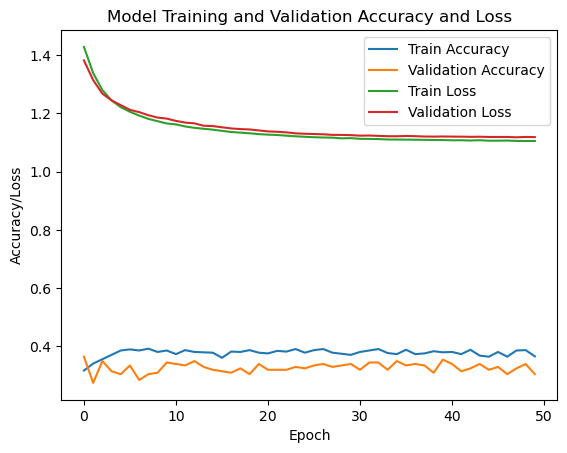

In [69]:
def create_model(l1_lambda=0.01):
    model = Sequential([
        Dense(64, input_dim=X_train_d.shape[1], activation='relu', kernel_regularizer=l1(l1_lambda)),
        Dense(32, activation='relu', kernel_regularizer=l1(l1_lambda)),
        Dense(y_train_categorical.shape[1], activation='softmax', kernel_regularizer=l1(l1_lambda))
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model





model = create_model(l1_lambda=0.001) 
history = model.fit(X_train_d, y_train_categorical, validation_data=(X_val, y_val_categorical),
                    epochs=50, batch_size=10, verbose=2)


evaluate_model(model, X_train_d, y_train_categorical, X_val, y_val_categorical)


We also see the same insufficient performance in the Lasso application. Since our data set is not very complex, it does not respond to regulations as much as we would like. Finally, we will use an early stopper.

### Early_stop

Epoch 1/50


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_loss improved from inf to 1.10470, saving model to best_model.keras
80/80 - 0s - 5ms/step - accuracy: 0.3313 - loss: 1.1026 - val_accuracy: 0.3450 - val_loss: 1.1047
Epoch 2/50

Epoch 2: val_loss did not improve from 1.10470
80/80 - 0s - 480us/step - accuracy: 0.3638 - loss: 1.0953 - val_accuracy: 0.2900 - val_loss: 1.1053
Epoch 3/50

Epoch 3: val_loss did not improve from 1.10470
80/80 - 0s - 512us/step - accuracy: 0.3663 - loss: 1.0922 - val_accuracy: 0.3550 - val_loss: 1.1054
Epoch 4/50

Epoch 4: val_loss did not improve from 1.10470
80/80 - 0s - 540us/step - accuracy: 0.3988 - loss: 1.0898 - val_accuracy: 0.3200 - val_loss: 1.1079
Epoch 5/50

Epoch 5: val_loss did not improve from 1.10470
80/80 - 0s - 511us/step - accuracy: 0.3812 - loss: 1.0897 - val_accuracy: 0.3050 - val_loss: 1.1103
Epoch 6/50

Epoch 6: val_loss did not improve from 1.10470
80/80 - 0s - 447us/step - accuracy: 0.3887 - loss: 1.0875 - val_accuracy: 0.3150 - val_loss: 1.1101
Epoch 7/50

Epoch 7: val_

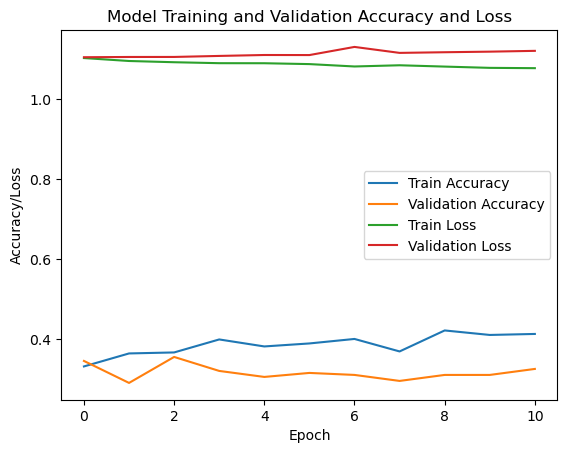

In [70]:
def create_model():
    model = Sequential([
        Dense(64, input_dim=X_train_d.shape[1], activation='relu'),
        Dense(32, activation='relu'),
        Dense(y_train_categorical.shape[1], activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


model = create_model()

# Callbacks: EarlyStopping and ModelCheckpoint
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)


history = model.fit(
    X_train_d, y_train_categorical,
    validation_data=(X_val, y_val_categorical),
    epochs=50,
    batch_size=10,
    verbose=2,
    callbacks=[early_stop, checkpoint]
)


def evaluate_model(model, X_train_d, y_train_categorical, X_val, y_val_categorical):
    y_pred_train = model.predict(X_train_d)
    y_pred_train_classes = np.argmax(y_pred_train, axis=1)
    y_train_classes = np.argmax(y_train_categorical, axis=1)

    y_pred_val = model.predict(X_val)
    y_pred_val_classes = np.argmax(y_pred_val, axis=1)
    y_val_classes = np.argmax(y_val_categorical, axis=1)

    print("Training Set Performance:")
    print(confusion_matrix(y_train_classes, y_pred_train_classes))
    print(classification_report(y_train_classes, y_pred_train_classes))
    print("Validation Set Performance:")
    print(confusion_matrix(y_val_classes, y_pred_val_classes))
    print(classification_report(y_val_classes, y_pred_val_classes))


evaluate_model(model, X_train_d, y_train_categorical, X_val, y_val_categorical)


plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training and Validation Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()


In this model, there is a slight improvement in our suspect class, but in general, we could not achieve the efficiency of the basic MLP model in this regulation.

## 5. Evaluating Models

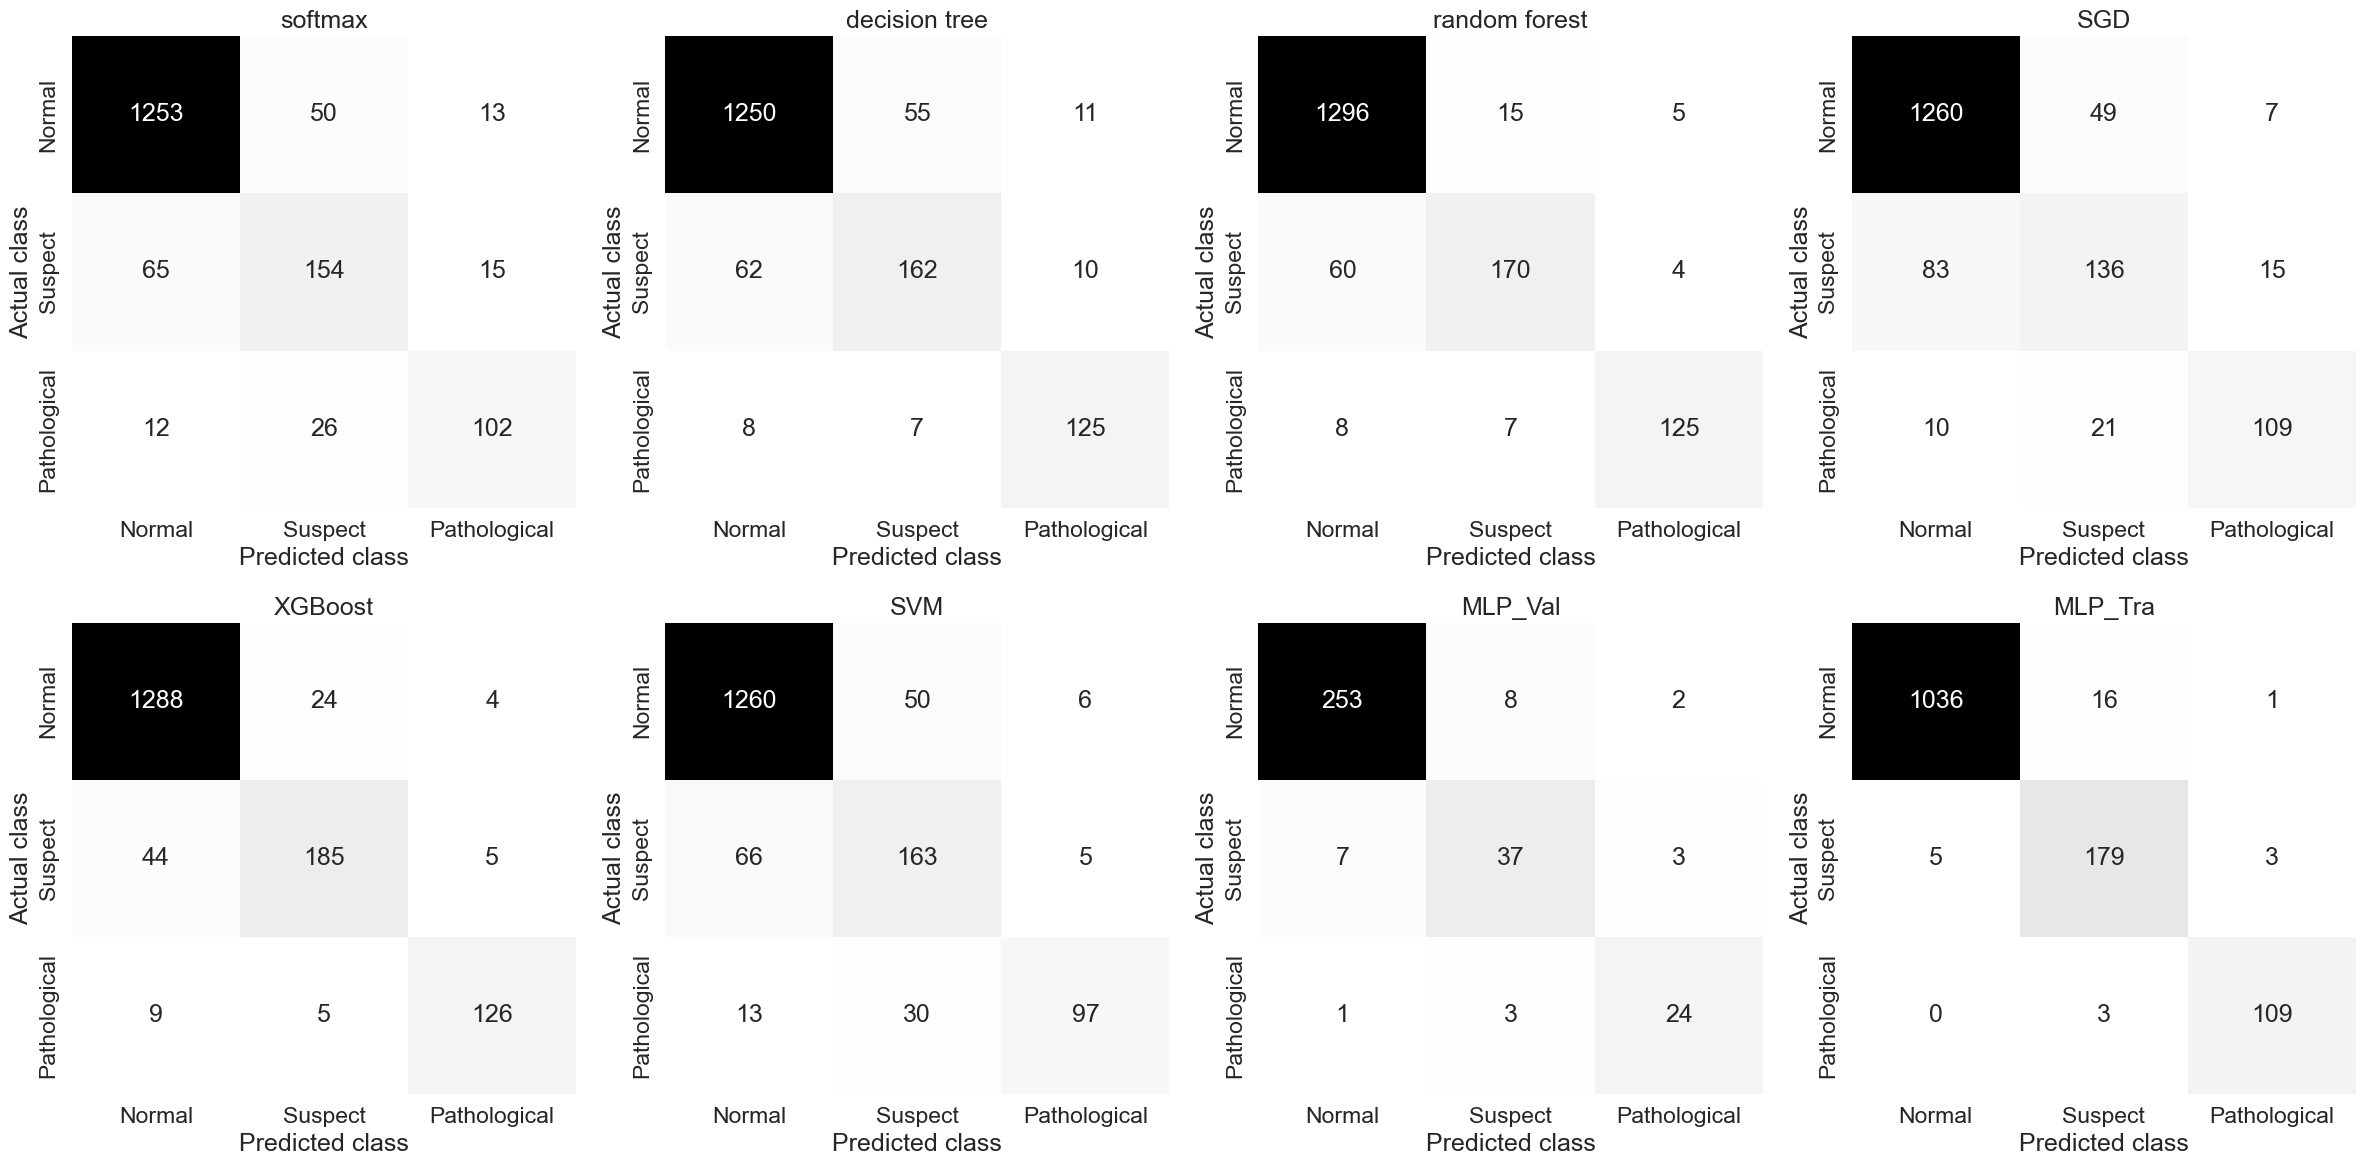

In [71]:
# Collecting the names and the confusion matrices into lists.
mlp_validation_cm = confusion_matrix(y_val_classes, y_pred_val_classes)
mlp_training_cm = confusion_matrix(y_train_classes, y_pred_train_classes)
conf_matrix_list = [cv_conf_mtx, cm_dt_cv, conf_matrix_rf_cv, conf_matrix_sgd_cv, conf_matrix_xgb_cv, conf_matrix_svm_cv, mlp_validation_cm, mlp_training_cm]
matrix_titles = ['softmax', 'decision tree', 'random forest', 'SGD', 'XGBoost', 'SVM', 'MLP_Val', 'MLP_Tra']

# Set the figure size and font sizes
plt.figure(figsize=(24, 12)) 
sns.set(font_scale=1.5)  

class_names = ['Normal', 'Suspect', 'Pathological']

# Plot subplots for each confusion matrix
for i, (matrix, title) in enumerate(zip(conf_matrix_list, matrix_titles), 1):
    plt.subplot(2, 4, i)
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Greys', cbar=False, xticklabels=class_names, yticklabels=class_names)
    plt.title(title)
    plt.ylabel('Actual class')
    plt.xlabel('Predicted class')


plt.tight_layout()
plt.show()


When the confusion matrices of all seven models created are examined, the MLP training confusion matrix scores show that it is the most robust model. Since all models make predictions based on the training set, it is necessary to consider the confusion matrix of the training set as a comparison in the MLP model. We put the MLP validation matrix in this frame to better understand the model. Based on Confusion Matrices, the most powerful model is the MLP model. Now, let's look at the scores of these models and make a better comparison:

In [72]:
accuracy_mlp_val=accuracy_score(y_val_classes, y_pred_val_classes)
f1_mlp_val=f1_score(y_val_classes, y_pred_val_classes, average='weighted')
recall_mlp_val=recall_score(y_val_classes, y_pred_val_classes, average='weighted')
precision_mlp_val=precision_score(y_val_classes, y_pred_val_classes, average='weighted')

accuracy_mlp_tra=accuracy_score(y_train_classes, y_pred_train_classes)
f1_mlp_tra=f1_score(y_train_classes, y_pred_train_classes, average='weighted')
recall_mlp_tra=recall_score(y_train_classes, y_pred_train_classes, average='weighted')
precision_mlp_tra=precision_score(y_train_classes, y_pred_train_classes, average='weighted')

data = {
    'Classifier': ['Softmax', 'Decision Tree', 'Random Forest', 'SGD', 'XGBoost', 'SVM', 'MLP Validation', 'MLP Training'],
    'Accuracy': [accuracy_sfm, accuracy_cv_dt, accuracy_rf, accuracy_sgd_cv, accuracy_xgb_cv, accuracy_svm_cv, accuracy_mlp_val, accuracy_mlp_tra],
    'F1': [f1_sfm, f1_cv_dt, f1_rf, f1_sgd_cv, f1_xgb_cv, f1_svm_cv, f1_mlp_val, f1_mlp_tra],
    'Recall': [recall_sfm, recall_cv_dt, recall_rf, recall_sgd_cv, recall_xgb_cv, recall_svm_cv, recall_mlp_val, recall_mlp_tra],
    'Precision': [precision_sfm, precision_cv_dt, precision_rf, precision_sgd_cv, precision_xgb_cv, precision_svm_cv, precision_mlp_val, precision_mlp_tra]
}

df = pd.DataFrame(data)
df

,Classifier,Accuracy,F1,Recall,Precision
0,Softmax,0.8929,0.8920,0.8929,0.8913
1,Decision Tree,0.9095,0.9089,0.9095,0.9085
2,Random Forest,0.9414,0.9392,0.9414,0.9397
3,SGD,0.8905,0.8875,0.8905,0.8855
4,XGBoost,0.9462,0.9452,0.9462,0.9449
5,SVM,0.8994,0.8985,0.8994,0.9000
6,MLP Validation,0.9290,0.9295,0.9290,0.9300
7,MLP Training,0.9793,0.9795,0.9793,0.9801


When we look at the scores, we can see that the MLP model is quite strong compared to other models. Now we will perform random and grid search on the MLP model to select the best parameters and get the best possible result.

### 5.1 Grid Search

In [73]:
def create_model(layers, activation, optimizer):
    model = Sequential()
    model.add(Dense(layers, input_dim=X_train_d.shape[1], activation=activation))
    model.add(Dense(32, activation=activation))
    model.add(Dense(y_train_categorical.shape[1], activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# KerasClassifier for the model
model = KerasClassifier(build_fn=create_model, model__layers=64, model__activation='relu', model__optimizer='adam')

# Grid search parameters
param_grid = {
    'batch_size': [10, 20, 50],
    'epochs': [10, 50],
    'model__layers': [16, 32, 64, 128],
    'model__activation': ['relu', 'tanh'],
}

# Creating GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train_d, y_train_categorical, verbose=0)

# Show the results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`inp

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`inp

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step
 1/27 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`inp

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`inp

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`inp

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
 1/27 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`inp

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`inp

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`inp

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`inp

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`inp

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`inp

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`inp

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`inp

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`inp

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`inp

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
 1/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`inp

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`inp

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
 1/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`inp

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`inp

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`inp

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`inp

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
 1/14 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step

/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`inp

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`inp

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`inp

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`inp

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
 1/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`inp

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`inp

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`inp

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`inp

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`inp

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
 1/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`inp

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`inp

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`inp

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`inp

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`inp

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`inp

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`inp

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`inp

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`inp

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`inp

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best: 0.355003 using {'batch_size': 50, 'epochs': 50, 'model__activation': 'relu', 'model__layers': 16}


The best grid search result has a much lower accuracy value than the first MLP model. That's why the most powerful model still remains the first MLP model.

### 5.2 Random Search

In [74]:
def create_model(layers, neurons, activation, optimizer):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train_rs.shape[1], activation=activation))
    for i in range(1, layers):
        model.add(Dense(neurons, activation=activation))
    model.add(Dense(y_train_categorical_rs.shape[1], activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Data preparation with different names
X_train_rs, X_val_rs, y_train_rs, y_val_rs = train_test_split(X, y, test_size=0.2, random_state=42)
y_train_categorical_rs = to_categorical(y_train_rs)
y_val_categorical_rs = to_categorical(y_val_rs)


model_rs = KerasClassifier(model=create_model, verbose=0)


param_distribution = {
    'model__layers': [1, 2, 3],
    'model__neurons': [32, 64, 128],
    'model__activation': ['relu', 'tanh', 'sigmoid'],
    'model__optimizer': ['adam', 'rmsprop'],
    'batch_size': [10, 20, 50],
    'epochs': [10, 50, 100]
}

# Applying RandomizedSearchCV
random_search_rs = RandomizedSearchCV(estimator=model_rs, param_distributions=param_distribution, n_iter=10, cv=3, random_state=42)
random_search_rs.fit(X_train_rs, y_train_categorical_rs)

print("Best: %f using %s" % (random_search_rs.best_score_, random_search_rs.best_params_))


/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/alperenunal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activi

Best: 0.917157 using {'model__optimizer': 'adam', 'model__neurons': 128, 'model__layers': 3, 'model__activation': 'relu', 'epochs': 100, 'batch_size': 50}


Although the accuracy value of the best hyperparameter combination we obtained as a result of random search is quite high, it is not better than the first MLP model. For this reason, the best model of the project is the first MLP model.

### 5.3 Evaluation the Best Model on the Test Set

In [75]:
# Converting the labels to categorical
y_test_categorical = to_categorical(y_test)

# Predictions
y_pred_test = model1.predict(X_test)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_test_classes = np.argmax(y_test_categorical, axis=1)

# Evaluation
test_accuracy = accuracy_score(y_test_classes, y_pred_test_classes)
test_f1_score = f1_score(y_test_classes, y_pred_test_classes, average='weighted')
test_recall = recall_score(y_test_classes, y_pred_test_classes, average='weighted')
test_precision = precision_score(y_test_classes, y_pred_test_classes, average='weighted')

# Printing the performance metrics
print("Test Set Performance:")
print("Accuracy Score:", test_accuracy)
print("F1 Score:", test_f1_score)
print("Recall Score:", test_recall)
print("Precision Score:", test_precision)
print("Confusion Matrix:\n", confusion_matrix(y_test_classes, y_pred_test_classes))
print("Classification Report:\n", classification_report(y_test_classes, y_pred_test_classes))


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
Test Set Performance:
Accuracy Score: 0.9125295508274232
F1 Score: 0.9110484960989167
Recall Score: 0.9125295508274232
Precision Score: 0.9100311798900971
Confusion Matrix:
 [[318  11   1]
 [ 15  38   5]
 [  1   4  30]]
Classification Report:
               precision    recall  f1-score   support

           1       0.95      0.96      0.96       330
           2       0.72      0.66      0.68        58
           3       0.83      0.86      0.85        35

    accuracy                           0.91       423
   macro avg       0.83      0.83      0.83       423
weighted avg       0.91      0.91      0.91       423



The MLP model's evaluation on the test set for fetal health classification shows high overall accuracy and precision, indicating that the model performs well in identifying the correct class for most cases. Specifically, for 'normal' (1) cases, the model shows high precision and recall, suggesting it can reliably identify normal cases and distinguish them from 'suspect' (2) or 'pathological' (3). However, for 'suspect' cases, the model's lower precision and recall indicate some difficulty in correctly classifying these instances, which could lead to a higher rate of false positives or false negatives. For 'pathological' cases, the precision and recall are reasonably high, indicating better performance, though not as high as 'normal' cases. The results suggest that while the model is quite robust in identifying normal and pathological cases, it might benefit from further refinement to improve its detection of 'suspect' cases, which are crucial for preventing potential health issues.